In [2]:
import matplotlib.pyplot as plt
from utilsCPD import *
from SWCPD import BaseDetector as SWDCP

In [1]:
from itertools import product
import time as time
import zipfile
import json

zip_file_path = './datasets/MNISTSeq.zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_contents = zip_ref.namelist()
    json_file_name = zip_contents[0]
    with zip_ref.open(json_file_name) as json_file:
        data = json.load(json_file)

### Window Lenght

In [4]:
WindowLength = [5,20,50,70,100]#,200]
Significance = [0.05]#,0.1,0.2]
Lookback = [20]#,0.8,0.5]
MonteCarloSample = [1000] #[200,1000,5000]
WassersteinOrder = [4]#[1,2,4]

METRICS = {}

for rs in data.keys():
    df = np.array(data[rs]['data']).astype(np.float32)
    GroundTruth = data[rs]['target']
    METRICS[rs] = {}

    print(GroundTruth)

    for combination in product(WindowLength,Significance,Lookback,MonteCarloSample,WassersteinOrder):
        print(combination)
        k,significance, lookack,L,p = combination
        print(k)
        METRICS[rs][k] = {}
        detector = SWDCP(data=df,window_length=k,max_history=k,significance=significance)
        start = time.time()
        detector.process_dataloader(p=p,n_theta=L,explanations=False,seed=2025,verbose=False)
        end = time.time()
        print(end-start)
        f1,cov, auc_score = detector.evaluate(GroundTruth,20)
        METRICS[rs][k]['F1'] = f1
        METRICS[rs][k]['Covering'] = cov
        METRICS[rs][k]['AUC'] = auc_score
        METRICS[rs][k]['cps'] = detector.change_points
        METRICS[rs][k]['RunTime'] = end-start



[200, 400]
(5, 0.05, 20, 1000, 4)
5


  0%|          | 0/596 [00:00<?, ?it/s]

100%|██████████| 596/596 [00:05<00:00, 108.79it/s]


5.480008602142334
F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
(20, 0.05, 20, 1000, 4)
20


100%|██████████| 581/581 [00:05<00:00, 97.12it/s] 


5.984766960144043
F1 score: 0.8
Covering: 0.6467338217338217
0.8333333333333333
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 551/551 [00:05<00:00, 103.60it/s]


5.318488121032715
F1 score: 1.0
Covering: 0.884492389331099
1.0
(70, 0.05, 20, 1000, 4)
70


100%|██████████| 531/531 [00:05<00:00, 99.83it/s] 


5.33513069152832
F1 score: 0.3333333333333333
Covering: 0.8642226528417507
0.3333333333333333
(100, 0.05, 20, 1000, 4)
100


100%|██████████| 501/501 [00:05<00:00, 94.53it/s]


5.301119089126587
F1 score: 0.3333333333333333
Covering: 0.8195407285581958
0.3333333333333333
[200, 400]
(5, 0.05, 20, 1000, 4)
5


100%|██████████| 596/596 [00:05<00:00, 106.70it/s]


5.588648557662964
F1 score: 0.3333333333333333
Covering: 0.5101532274744762
0.3333333333333333
(20, 0.05, 20, 1000, 4)
20


100%|██████████| 581/581 [00:05<00:00, 102.01it/s]


5.698701858520508
F1 score: 0.8
Covering: 0.6525298090988433
0.8333333333333333
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 121.22it/s]


4.54749608039856
F1 score: 0.8
Covering: 0.6374043592066848
0.8333333333333333
(70, 0.05, 20, 1000, 4)
70


100%|██████████| 531/531 [00:04<00:00, 106.85it/s]


4.969458818435669
F1 score: 0.5714285714285715
Covering: 0.8560893404289631
0.5833333333333334
(100, 0.05, 20, 1000, 4)
100


100%|██████████| 501/501 [00:05<00:00, 94.57it/s] 


5.299735069274902
F1 score: 0.5714285714285715
Covering: 0.8143906444670971
0.5833333333333334
[200, 400]
(5, 0.05, 20, 1000, 4)
5


100%|██████████| 596/596 [00:05<00:00, 110.62it/s]


5.389824151992798
F1 score: 0.28571428571428575
Covering: 0.4165669515669515
0.29166666666666663
(20, 0.05, 20, 1000, 4)
20


100%|██████████| 581/581 [00:05<00:00, 103.34it/s]


5.625325441360474
F1 score: 1.0
Covering: 0.945069009937431
1.0
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 551/551 [00:05<00:00, 110.20it/s]


5.001070737838745
F1 score: 1.0
Covering: 0.9203417781321049
1.0
(70, 0.05, 20, 1000, 4)
70


100%|██████████| 531/531 [00:04<00:00, 108.24it/s]


4.911715030670166
F1 score: 1.0
Covering: 0.9142663039503898
1.0
(100, 0.05, 20, 1000, 4)
100


100%|██████████| 501/501 [00:05<00:00, 92.98it/s]


5.390220403671265
F1 score: 1.0
Covering: 0.8874477972069665
1.0
[200, 400]
(5, 0.05, 20, 1000, 4)
5


100%|██████████| 596/596 [00:05<00:00, 108.52it/s]


5.494973182678223
F1 score: 0.6666666666666666
Covering: 0.5471995115252737
0.6666666666666666
(20, 0.05, 20, 1000, 4)
20


100%|██████████| 581/581 [00:05<00:00, 105.43it/s]


5.511720180511475
F1 score: 1.0
Covering: 0.9482095169852607
1.0
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 117.93it/s]


4.6723737716674805
F1 score: 1.0
Covering: 0.9112555322618217
1.0
(70, 0.05, 20, 1000, 4)
70


100%|██████████| 531/531 [00:04<00:00, 107.59it/s]


4.93517541885376
F1 score: 1.0
Covering: 0.9295339652448656
1.0
(100, 0.05, 20, 1000, 4)
100


100%|██████████| 501/501 [00:05<00:00, 93.87it/s]


5.338185787200928
F1 score: 1.0
Covering: 0.9082888444483088
1.0
[200, 400]
(5, 0.05, 20, 1000, 4)
5


100%|██████████| 596/596 [00:05<00:00, 111.31it/s]


5.360360383987427
F1 score: 0.3333333333333333
Covering: 0.387681755829904
0.3333333333333333
(20, 0.05, 20, 1000, 4)
20


100%|██████████| 581/581 [00:05<00:00, 102.25it/s]


5.685237884521484
F1 score: 1.0
Covering: 0.9513582311408398
1.0
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 118.70it/s]


4.642599821090698
F1 score: 1.0
Covering: 0.9326685325628987
1.0
(70, 0.05, 20, 1000, 4)
70


100%|██████████| 531/531 [00:04<00:00, 106.24it/s]


4.997901201248169
F1 score: 1.0
Covering: 0.9265105307874615
1.0
(100, 0.05, 20, 1000, 4)
100


100%|██████████| 501/501 [00:05<00:00, 89.50it/s]


5.599592208862305
F1 score: 1.0
Covering: 0.9052713052508601
1.0
[200, 400, 600]
(5, 0.05, 20, 1000, 4)
5


100%|██████████| 796/796 [00:07<00:00, 108.57it/s]


7.333887100219727
F1 score: 0.4
Covering: 0.25
0.625
(20, 0.05, 20, 1000, 4)
20


100%|██████████| 781/781 [00:07<00:00, 103.13it/s]


7.574930667877197
F1 score: 1.0
Covering: 0.9349306395359026
1.0
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 117.46it/s]


6.394312620162964
F1 score: 0.75
Covering: 0.8810739675016928
0.75
(70, 0.05, 20, 1000, 4)
70


100%|██████████| 731/731 [00:06<00:00, 107.82it/s]


6.781581163406372
F1 score: 0.75
Covering: 0.8631547532579156
0.75
(100, 0.05, 20, 1000, 4)
100


100%|██████████| 701/701 [00:07<00:00, 94.10it/s]


7.451524019241333
F1 score: 0.5
Covering: 0.8164985723002167
0.5
[200, 400, 600]
(5, 0.05, 20, 1000, 4)
5


100%|██████████| 796/796 [00:06<00:00, 118.80it/s]


6.70174765586853
F1 score: 0.5
Covering: 0.6268206559986198
0.5
(20, 0.05, 20, 1000, 4)
20


100%|██████████| 781/781 [00:06<00:00, 113.93it/s]


6.860655069351196
F1 score: 1.0
Covering: 0.9512680530571564
1.0
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 117.06it/s]


6.423643350601196
F1 score: 1.0
Covering: 0.9004041707032482
1.0
(70, 0.05, 20, 1000, 4)
70


100%|██████████| 731/731 [00:06<00:00, 108.08it/s]


6.763429164886475
F1 score: 0.6666666666666665
Covering: 0.8741896679574853
0.675
(100, 0.05, 20, 1000, 4)
100


100%|██████████| 701/701 [00:07<00:00, 93.32it/s]


7.512744903564453
F1 score: 0.6666666666666665
Covering: 0.8235239255396095
0.675
[200, 400, 600]
(5, 0.05, 20, 1000, 4)
5


100%|██████████| 796/796 [00:07<00:00, 106.36it/s]


7.486190557479858
F1 score: 0.75
Covering: 0.6578122722940165
0.75
(20, 0.05, 20, 1000, 4)
20


100%|██████████| 781/781 [00:07<00:00, 107.67it/s]


7.255907773971558
F1 score: 0.8571428571428571
Covering: 0.7296644781654226
0.875
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 115.61it/s]


6.495896816253662
F1 score: 1.0
Covering: 0.8940539919513603
1.0
(70, 0.05, 20, 1000, 4)
70


100%|██████████| 731/731 [00:06<00:00, 107.12it/s]


6.824237108230591
F1 score: 0.6666666666666665
Covering: 0.8973259296653581
0.675
(100, 0.05, 20, 1000, 4)
100


100%|██████████| 701/701 [00:07<00:00, 94.36it/s]


7.42993688583374
F1 score: 0.75
Covering: 0.8542445722113828
0.75
[200, 400, 600]
(5, 0.05, 20, 1000, 4)
5


100%|██████████| 796/796 [00:07<00:00, 112.57it/s]


7.07283353805542
F1 score: 0.6666666666666666
Covering: 0.4958929396572353
0.75
(20, 0.05, 20, 1000, 4)
20


100%|██████████| 781/781 [00:06<00:00, 128.27it/s]


6.089564800262451
F1 score: 1.0
Covering: 0.9418799173747686
1.0
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 116.19it/s]


6.4645209312438965
F1 score: 1.0
Covering: 0.8895717232879649
1.0
(70, 0.05, 20, 1000, 4)
70


100%|██████████| 731/731 [00:07<00:00, 101.27it/s]


7.219399690628052
F1 score: 0.75
Covering: 0.8717365969517411
0.75
(100, 0.05, 20, 1000, 4)
100


100%|██████████| 701/701 [00:07<00:00, 96.22it/s] 


7.293736696243286
F1 score: 0.5
Covering: 0.8566633148986089
0.5
[200, 400, 600]
(5, 0.05, 20, 1000, 4)
5


100%|██████████| 796/796 [00:07<00:00, 108.92it/s]


7.3109002113342285
F1 score: 0.5714285714285715
Covering: 0.41091757019910724
0.5833333333333333
(20, 0.05, 20, 1000, 4)
20


100%|██████████| 781/781 [00:07<00:00, 110.07it/s]


7.10179328918457
F1 score: 1.0
Covering: 0.944333466241361
1.0
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 117.83it/s]


6.37560510635376
F1 score: 0.75
Covering: 0.8901308893944023
0.75
(70, 0.05, 20, 1000, 4)
70


100%|██████████| 731/731 [00:06<00:00, 107.31it/s]


6.8120951652526855
F1 score: 0.75
Covering: 0.8776382461890653
0.75
(100, 0.05, 20, 1000, 4)
100


100%|██████████| 701/701 [00:07<00:00, 94.88it/s]


7.387945652008057
F1 score: 0.6666666666666665
Covering: 0.8606100027693395
0.675
[200, 400, 600, 800]
(5, 0.05, 20, 1000, 4)
5


100%|██████████| 996/996 [00:08<00:00, 121.35it/s]


8.209765672683716
F1 score: 0.5
Covering: 0.47818111926944085
0.5333333333333333
(20, 0.05, 20, 1000, 4)
20


100%|██████████| 981/981 [00:08<00:00, 114.87it/s]


8.551080465316772
F1 score: 0.7499999999999999
Covering: 0.5801779359636503
0.8
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 951/951 [00:08<00:00, 114.65it/s]


8.295830726623535
F1 score: 0.888888888888889
Covering: 0.7236735619152913
0.9
(70, 0.05, 20, 1000, 4)
70


100%|██████████| 931/931 [00:09<00:00, 103.31it/s]


9.017898082733154
F1 score: 0.5454545454545454
Covering: 0.8451962412622834
0.5499999999999999
(100, 0.05, 20, 1000, 4)
100


100%|██████████| 901/901 [00:09<00:00, 93.59it/s]


9.635152578353882
F1 score: 0.4000000000000001
Covering: 0.7956588998269695
0.39999999999999997
[200, 400, 600, 800]
(5, 0.05, 20, 1000, 4)
5


100%|██████████| 996/996 [00:08<00:00, 118.77it/s]


8.388936758041382
F1 score: 0.22222222222222224
Covering: 0.35673015873015873
0.225
(20, 0.05, 20, 1000, 4)
20


100%|██████████| 981/981 [00:09<00:00, 102.88it/s]


9.53614068031311
F1 score: 0.888888888888889
Covering: 0.7671451861015967
0.9
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 951/951 [00:08<00:00, 111.76it/s]


8.51106309890747
F1 score: 1.0
Covering: 0.8914181417498702
1.0
(70, 0.05, 20, 1000, 4)
70


100%|██████████| 931/931 [00:08<00:00, 105.36it/s]


8.835988283157349
F1 score: 0.7272727272727272
Covering: 0.8808389452508603
0.7333333333333333
(100, 0.05, 20, 1000, 4)
100


100%|██████████| 901/901 [00:09<00:00, 92.28it/s]


9.766414642333984
F1 score: 0.6
Covering: 0.8515599044602652
0.6
[200, 400, 600, 800]
(5, 0.05, 20, 1000, 4)
5


100%|██████████| 996/996 [00:09<00:00, 106.70it/s]


9.336271286010742
F1 score: 0.25
Covering: 0.3655008584230141
0.26666666666666666
(20, 0.05, 20, 1000, 4)
20


100%|██████████| 981/981 [00:08<00:00, 111.13it/s]


8.82929253578186
F1 score: 0.888888888888889
Covering: 0.7627420454446211
0.9
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 951/951 [00:08<00:00, 108.81it/s]


8.741085052490234
F1 score: 1.0
Covering: 0.8895615843926294
1.0
(70, 0.05, 20, 1000, 4)
70


100%|██████████| 931/931 [00:12<00:00, 77.12it/s]


12.072422504425049
F1 score: 0.6
Covering: 0.8693438479202643
0.6
(100, 0.05, 20, 1000, 4)
100


100%|██████████| 901/901 [00:13<00:00, 68.95it/s]


13.070305109024048
F1 score: 0.4000000000000001
Covering: 0.8222970692548163
0.39999999999999997
[200, 400, 600, 800]
(5, 0.05, 20, 1000, 4)
5


100%|██████████| 996/996 [00:09<00:00, 101.87it/s]


9.7794349193573
F1 score: 0.5454545454545454
Covering: 0.7041053254612537
0.5499999999999999
(20, 0.05, 20, 1000, 4)
20


100%|██████████| 981/981 [00:10<00:00, 93.88it/s] 


10.449311971664429
F1 score: 1.0
Covering: 0.9437104924247302
1.0
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 951/951 [00:11<00:00, 79.47it/s]


11.96707272529602
F1 score: 1.0
Covering: 0.8960808774890625
1.0
(70, 0.05, 20, 1000, 4)
70


100%|██████████| 931/931 [00:11<00:00, 78.88it/s]


11.802730560302734
F1 score: 0.8000000000000002
Covering: 0.8979130186987138
0.8
(100, 0.05, 20, 1000, 4)
100


100%|██████████| 901/901 [00:13<00:00, 67.96it/s]


13.268667459487915
F1 score: 0.7272727272727272
Covering: 0.8755114608949055
0.7333333333333333
[200, 400, 600, 800]
(5, 0.05, 20, 1000, 4)
5


100%|██████████| 996/996 [00:09<00:00, 99.64it/s] 


9.995640993118286
F1 score: 0.16666666666666666
Covering: 0.29467001675041876
0.3483870967741935
(20, 0.05, 20, 1000, 4)
20


100%|██████████| 981/981 [00:10<00:00, 94.11it/s] 


10.423567771911621
F1 score: 1.0
Covering: 0.9418725700945381
1.0
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 951/951 [00:12<00:00, 78.78it/s]


12.073487520217896
F1 score: 1.0
Covering: 0.9089175641046217
1.0
(70, 0.05, 20, 1000, 4)
70


100%|██████████| 931/931 [00:11<00:00, 81.39it/s]


11.442381381988525
F1 score: 1.0
Covering: 0.8947017405713933
1.0
(100, 0.05, 20, 1000, 4)
100


100%|██████████| 901/901 [00:13<00:00, 68.97it/s]

13.067730903625488
F1 score: 0.6
Covering: 0.8686552085800866
0.6


In [5]:
import pandas as pd
import seaborn as sns

<Axes: >

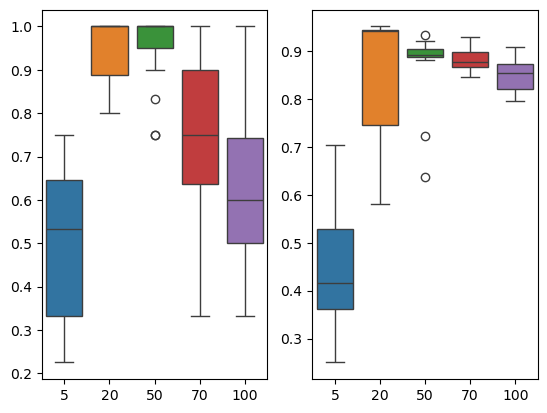

In [6]:
Plot_data_WC = {k: [] for k in WindowLength}
Plot_data_WAUC = {k: [] for k in WindowLength}

for seed, val in METRICS.items():
    for k, res in val.items():
        Plot_data_WC[k].append(res['Covering'])
        Plot_data_WAUC[k].append(res['AUC'])

fig, ax = plt.subplots(1,2)
sns.boxplot(Plot_data_WAUC,ax=ax[0])
sns.boxplot(Plot_data_WC,ax=ax[1])



In [7]:
WindowLength = [50]#,200]
Significance = [0.05]#,0.1,0.2]
Lookback = [5,10,20,50,100]#,0.8,0.5]
MonteCarloSample = [1000] #[200,1000,5000]
WassersteinOrder = [4]#[1,2,4]

METRICS_LB = {}

for rs in data.keys():
    df = np.array(data[rs]['data']).astype(np.float32)
    GroundTruth = data[rs]['target']
    METRICS_LB[rs] = {}

    print(GroundTruth)

    for combination in product(WindowLength,Significance,Lookback,MonteCarloSample,WassersteinOrder):
        print(combination)
        k,significance, lookack,L,p = combination
        print(k)
        METRICS_LB[rs][lookack] = {}
        detector = SWDCP(data=df,window_length=k,max_history=lookack,significance=significance)
        start = time.time()
        detector.process_dataloader(p=p,n_theta=L,explanations=False,seed=2025,verbose=False)
        end = time.time()
        print(end-start)
        f1,cov, auc_score = detector.evaluate(GroundTruth,20)
        METRICS_LB[rs][lookack]['F1'] = f1
        METRICS_LB[rs][lookack]['Covering'] = cov
        METRICS_LB[rs][lookack]['AUC'] = auc_score
        METRICS_LB[rs][lookack]['cps'] = detector.change_points
        METRICS_LB[rs][lookack]['RunTime'] = end-start

[200, 400]
(50, 0.05, 5, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 113.39it/s]


4.8613762855529785
F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
(50, 0.05, 10, 1000, 4)
50


100%|██████████| 551/551 [00:05<00:00, 109.02it/s]


5.055135726928711
F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 116.59it/s]


4.72584080696106
F1 score: 0.8
Covering: 0.6319971340282113
0.8333333333333333
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 119.78it/s]


4.60066556930542
F1 score: 1.0
Covering: 0.884492389331099
1.0
(50, 0.05, 100, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 121.09it/s]


4.551174163818359
F1 score: 1.0
Covering: 0.8874251415104265
1.0
[200, 400]
(50, 0.05, 5, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 118.98it/s]


4.63342547416687
F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
(50, 0.05, 10, 1000, 4)
50


100%|██████████| 551/551 [00:05<00:00, 109.16it/s]


5.047536849975586
F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 551/551 [00:05<00:00, 108.39it/s]


5.084623336791992
F1 score: 0.8
Covering: 0.6374043592066848
0.8333333333333333
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 117.75it/s]


4.679271221160889
F1 score: 0.8
Covering: 0.6374043592066848
0.8333333333333333
(50, 0.05, 100, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 120.80it/s]


4.56930136680603
F1 score: 0.8
Covering: 0.639238051426081
0.8333333333333333
[200, 400]
(50, 0.05, 5, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 120.53it/s]


4.576447486877441
F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
(50, 0.05, 10, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 117.25it/s]


4.700734376907349
F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 116.26it/s]


4.7392871379852295
F1 score: 0.8
Covering: 0.6355864197530865
0.8333333333333333
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 117.89it/s]


4.673843622207642
F1 score: 1.0
Covering: 0.9203417781321049
1.0
(50, 0.05, 100, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 117.11it/s]


4.70704460144043
F1 score: 1.0
Covering: 0.9203475359494492
1.0
[200, 400]
(50, 0.05, 5, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 119.95it/s]


4.595963716506958
F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
(50, 0.05, 10, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 118.39it/s]


4.654321193695068
F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 117.08it/s]


4.70616602897644
F1 score: 1.0
Covering: 0.9142890995260664
1.0
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 120.46it/s]


4.576113224029541
F1 score: 1.0
Covering: 0.9112555322618217
1.0
(50, 0.05, 100, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 117.30it/s]


4.699251651763916
F1 score: 1.0
Covering: 0.9264589108468211
1.0
[200, 400]
(50, 0.05, 5, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 116.99it/s]


4.712341785430908
F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
(50, 0.05, 10, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 121.37it/s]


4.539825677871704
F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 116.45it/s]


4.73295259475708
F1 score: 0.8
Covering: 0.6443317033414834
0.8333333333333333
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 120.41it/s]


4.576019048690796
F1 score: 1.0
Covering: 0.9326685325628987
1.0
(50, 0.05, 100, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 119.35it/s]


4.617654800415039
F1 score: 1.0
Covering: 0.932639252505191
1.0
[200, 400, 600]
(50, 0.05, 5, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 113.25it/s]


6.633185386657715
F1 score: 0.4
Covering: 0.25
0.625
(50, 0.05, 10, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 115.11it/s]


6.524852991104126
F1 score: 0.4
Covering: 0.25
0.625
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 116.90it/s]


6.425193786621094
F1 score: 0.8571428571428571
Covering: 0.7009251579778831
0.875
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 119.96it/s]


6.260601282119751
F1 score: 0.75
Covering: 0.8810739675016928
0.75
(50, 0.05, 100, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 119.15it/s]


6.302846670150757
F1 score: 0.75
Covering: 0.8896656117065445
0.75
[200, 400, 600]
(50, 0.05, 5, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 117.57it/s]


6.390393495559692
F1 score: 0.4
Covering: 0.25
0.625
(50, 0.05, 10, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 116.67it/s]


6.438836097717285
F1 score: 0.4
Covering: 0.25
0.625
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 117.01it/s]


6.421719551086426
F1 score: 0.8571428571428571
Covering: 0.6925730977647325
0.875
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 120.89it/s]


6.217721223831177
F1 score: 1.0
Covering: 0.9004041707032482
1.0
(50, 0.05, 100, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 115.65it/s]


6.493804931640625
F1 score: 0.888888888888889
Covering: 0.8959223328685968
0.9
[200, 400, 600]
(50, 0.05, 5, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 114.88it/s]


6.5399250984191895
F1 score: 0.4
Covering: 0.25
0.625
(50, 0.05, 10, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 119.69it/s]


6.280649662017822
F1 score: 0.4
Covering: 0.25
0.625
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 118.25it/s]


6.353160381317139
F1 score: 0.8571428571428571
Covering: 0.6989834067192691
0.875
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 117.82it/s]


6.375910043716431
F1 score: 1.0
Covering: 0.8940539919513603
1.0
(50, 0.05, 100, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 116.60it/s]


6.44246244430542
F1 score: 1.0
Covering: 0.9031331731513373
1.0
[200, 400, 600]
(50, 0.05, 5, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 120.10it/s]


6.2551374435424805
F1 score: 0.4
Covering: 0.25
0.625
(50, 0.05, 10, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 119.95it/s]


6.26344895362854
F1 score: 0.4
Covering: 0.25
0.625
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 116.50it/s]


6.448367118835449
F1 score: 0.8571428571428571
Covering: 0.6793876465647759
0.875
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 121.23it/s]


6.194688320159912
F1 score: 1.0
Covering: 0.8895717232879649
1.0
(50, 0.05, 100, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 115.66it/s]


6.494998455047607
F1 score: 1.0
Covering: 0.889503690362486
1.0
[200, 400, 600]
(50, 0.05, 5, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 119.17it/s]


6.302899599075317
F1 score: 0.4
Covering: 0.25
0.625
(50, 0.05, 10, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 120.63it/s]


6.2304463386535645
F1 score: 0.4
Covering: 0.25
0.625
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 120.33it/s]


6.24227237701416
F1 score: 0.5714285714285715
Covering: 0.6930881505056444
0.5833333333333333
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 115.12it/s]


6.523427724838257
F1 score: 0.75
Covering: 0.8901308893944023
0.75
(50, 0.05, 100, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 109.36it/s]


6.875141143798828
F1 score: 1.0
Covering: 0.9032474925227869
1.0
[200, 400, 600, 800]
(50, 0.05, 5, 1000, 4)
50


100%|██████████| 951/951 [00:07<00:00, 122.12it/s]


7.790297985076904
F1 score: 0.33333333333333337
Covering: 0.2
0.6000000000000001
(50, 0.05, 10, 1000, 4)
50


100%|██████████| 951/951 [00:07<00:00, 120.98it/s]


7.863755464553833
F1 score: 0.33333333333333337
Covering: 0.2
0.6000000000000001
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 951/951 [00:09<00:00, 102.23it/s]


9.303683996200562
F1 score: 0.7499999999999999
Covering: 0.5668677960075343
0.8
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 951/951 [00:13<00:00, 70.86it/s]


13.420213222503662
F1 score: 0.888888888888889
Covering: 0.7236735619152913
0.9
(50, 0.05, 100, 1000, 4)
50


100%|██████████| 951/951 [00:12<00:00, 74.66it/s]


12.737945079803467
F1 score: 1.0
Covering: 0.8834553780298271
1.0
[200, 400, 600, 800]
(50, 0.05, 5, 1000, 4)
50


100%|██████████| 951/951 [00:12<00:00, 74.97it/s]


12.685150146484375
F1 score: 0.33333333333333337
Covering: 0.2
0.6000000000000001
(50, 0.05, 10, 1000, 4)
50


100%|██████████| 951/951 [00:12<00:00, 74.16it/s]


12.823091506958008
F1 score: 0.33333333333333337
Covering: 0.2
0.6000000000000001
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 951/951 [00:12<00:00, 76.00it/s]


12.51438283920288
F1 score: 0.6666666666666665
Covering: 0.7363511018672754
0.675
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 951/951 [00:12<00:00, 77.62it/s]


12.256166458129883
F1 score: 1.0
Covering: 0.8914181417498702
1.0
(50, 0.05, 100, 1000, 4)
50


100%|██████████| 951/951 [00:11<00:00, 81.62it/s]


11.655036449432373
F1 score: 1.0
Covering: 0.893172791361874
1.0
[200, 400, 600, 800]
(50, 0.05, 5, 1000, 4)
50


100%|██████████| 951/951 [00:12<00:00, 79.25it/s]


12.003480195999146
F1 score: 0.33333333333333337
Covering: 0.2
0.6000000000000001
(50, 0.05, 10, 1000, 4)
50


100%|██████████| 951/951 [00:12<00:00, 75.64it/s]


12.5877046585083
F1 score: 0.33333333333333337
Covering: 0.2
0.6000000000000001
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 951/951 [00:12<00:00, 76.09it/s]


12.498294830322266
F1 score: 0.888888888888889
Covering: 0.7312024083247864
0.9
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 951/951 [00:12<00:00, 77.22it/s]


12.329153060913086
F1 score: 1.0
Covering: 0.8895615843926294
1.0
(50, 0.05, 100, 1000, 4)
50


100%|██████████| 951/951 [00:12<00:00, 77.29it/s]


12.320502758026123
F1 score: 1.0
Covering: 0.8860520500574068
1.0
[200, 400, 600, 800]
(50, 0.05, 5, 1000, 4)
50


100%|██████████| 951/951 [00:12<00:00, 76.23it/s]


12.475235223770142
F1 score: 0.33333333333333337
Covering: 0.2
0.6000000000000001
(50, 0.05, 10, 1000, 4)
50


100%|██████████| 951/951 [00:12<00:00, 76.81it/s]


12.39250373840332
F1 score: 0.33333333333333337
Covering: 0.2
0.6000000000000001
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 951/951 [00:12<00:00, 76.60it/s]


12.415581941604614
F1 score: 0.888888888888889
Covering: 0.7346080748661238
0.9
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 951/951 [00:13<00:00, 69.88it/s]


13.609424114227295
F1 score: 1.0
Covering: 0.8960808774890625
1.0
(50, 0.05, 100, 1000, 4)
50


100%|██████████| 951/951 [00:12<00:00, 76.43it/s]


12.451487064361572
F1 score: 1.0
Covering: 0.9050105462449567
1.0
[200, 400, 600, 800]
(50, 0.05, 5, 1000, 4)
50


100%|██████████| 951/951 [00:12<00:00, 77.62it/s]


12.25217342376709
F1 score: 0.33333333333333337
Covering: 0.2
0.6000000000000001
(50, 0.05, 10, 1000, 4)
50


100%|██████████| 951/951 [00:12<00:00, 77.18it/s]


12.321797847747803
F1 score: 0.5714285714285715
Covering: 0.3958007811582854
0.7
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 951/951 [00:11<00:00, 81.10it/s]


11.726961612701416
F1 score: 0.888888888888889
Covering: 0.7434486802122758
0.9
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 951/951 [00:12<00:00, 78.60it/s]


12.116134643554688
F1 score: 1.0
Covering: 0.9089175641046217
1.0
(50, 0.05, 100, 1000, 4)
50


100%|██████████| 951/951 [00:12<00:00, 78.67it/s]

12.092885255813599
F1 score: 0.8333333333333333
Covering: 0.8771506090808416
0.8571428571428572


<Axes: >

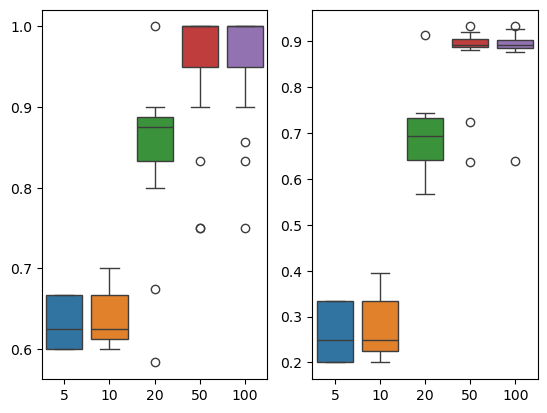

In [8]:
Plot_data_LookbackC = {k: [] for k in Lookback}
Plot_data_LookbackAUC = {k: [] for k in Lookback}

for seed, val in METRICS_LB.items():
    for k, res in val.items():
        Plot_data_LookbackC[k].append(res['Covering'])
        Plot_data_LookbackAUC[k].append(res['AUC'])

fig, ax = plt.subplots(1,2)
sns.boxplot(Plot_data_LookbackAUC,ax=ax[0])
sns.boxplot(Plot_data_LookbackC,ax=ax[1])

In [9]:
WindowLength = [50]#,200]
Significance = [0.05]#,0.1,0.2]
Lookback = [50]#,0.8,0.5]
MonteCarloSample = [100,200,500,1000,5000] #[200,1000,5000]
WassersteinOrder = [4]#[1,2,4]

METRICS_MCL = {}

for rs in data.keys():
    df = np.array(data[rs]['data']).astype(np.float32)
    GroundTruth = data[rs]['target']
    METRICS_MCL[rs] = {}

    print(GroundTruth)

    for combination in product(WindowLength,Significance,Lookback,MonteCarloSample,WassersteinOrder):
        print(combination)
        k,significance, lookack,L,p = combination
        print(k)
        METRICS_MCL[rs][L] = {}
        detector = SWDCP(data=df,window_length=k,max_history=lookack,significance=significance)
        start = time.time()
        detector.process_dataloader(p=p,n_theta=L,explanations=False,seed=2025,verbose=False)
        end = time.time()
        print(end-start)
        f1,cov, auc_score = detector.evaluate(GroundTruth,20)
        METRICS_MCL[rs][L]['F1'] = f1
        METRICS_MCL[rs][L]['Covering'] = cov
        METRICS_MCL[rs][L]['AUC'] = auc_score
        METRICS_MCL[rs][L]['cps'] = detector.change_points
        METRICS_MCL[rs][L]['RunTime'] = end-start

[200, 400]
(50, 0.05, 50, 100, 4)
50


100%|██████████| 551/551 [00:02<00:00, 242.97it/s]


2.2701315879821777
F1 score: 1.0
Covering: 0.8962937361324458
1.0
(50, 0.05, 50, 200, 4)
50


100%|██████████| 551/551 [00:02<00:00, 215.02it/s]


2.562610149383545
F1 score: 1.0
Covering: 0.8933256528417818
1.0
(50, 0.05, 50, 500, 4)
50


100%|██████████| 551/551 [00:03<00:00, 139.81it/s]


3.9409799575805664
F1 score: 1.0
Covering: 0.8903695091531729
1.0
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 551/551 [00:05<00:00, 101.72it/s]


5.416600227355957
F1 score: 1.0
Covering: 0.884492389331099
1.0
(50, 0.05, 50, 5000, 4)
50


100%|██████████| 551/551 [00:12<00:00, 43.25it/s]


12.739398956298828
F1 score: 1.0
Covering: 0.8874298540965208
1.0
[200, 400]
(50, 0.05, 50, 100, 4)
50


100%|██████████| 551/551 [00:02<00:00, 217.57it/s]


2.5325236320495605
F1 score: 0.6666666666666666
Covering: 0.8845961882405544
0.6666666666666666
(50, 0.05, 50, 200, 4)
50


100%|██████████| 551/551 [00:02<00:00, 188.41it/s]


2.9245035648345947
F1 score: 0.8
Covering: 0.639238051426081
0.8333333333333333
(50, 0.05, 50, 500, 4)
50


100%|██████████| 551/551 [00:05<00:00, 102.83it/s]


5.374304533004761
F1 score: 0.8
Covering: 0.6374043592066848
0.8333333333333333
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 551/551 [00:07<00:00, 76.70it/s]


7.183935880661011
F1 score: 0.8
Covering: 0.6374043592066848
0.8333333333333333
(50, 0.05, 50, 5000, 4)
50


100%|██████████| 551/551 [00:13<00:00, 41.87it/s]


13.176400899887085
F1 score: 0.8
Covering: 0.6374043592066848
0.8333333333333333
[200, 400]
(50, 0.05, 50, 100, 4)
50


100%|██████████| 551/551 [00:02<00:00, 227.43it/s]


2.4227659702301025
F1 score: 0.8571428571428571
Covering: 0.8903417781321049
0.875
(50, 0.05, 50, 200, 4)
50


100%|██████████| 551/551 [00:03<00:00, 154.26it/s]


3.5719258785247803
F1 score: 1.0
Covering: 0.9203417781321049
1.0
(50, 0.05, 50, 500, 4)
50


100%|██████████| 551/551 [00:05<00:00, 106.91it/s]


5.169776916503906
F1 score: 1.0
Covering: 0.9203417781321049
1.0
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 551/551 [00:06<00:00, 79.84it/s]


6.901336908340454
F1 score: 1.0
Covering: 0.9203417781321049
1.0
(50, 0.05, 50, 5000, 4)
50


100%|██████████| 551/551 [00:12<00:00, 42.95it/s]


12.827956914901733
F1 score: 1.0
Covering: 0.9173126432727914
1.0
[200, 400]
(50, 0.05, 50, 100, 4)
50


100%|██████████| 551/551 [00:02<00:00, 216.24it/s]


2.5481042861938477
F1 score: 1.0
Covering: 0.9112783468378942
1.0
(50, 0.05, 50, 200, 4)
50


100%|██████████| 551/551 [00:03<00:00, 183.40it/s]


3.019939661026001
F1 score: 1.0
Covering: 0.9233970807467237
1.0
(50, 0.05, 50, 500, 4)
50


100%|██████████| 551/551 [00:05<00:00, 105.64it/s]


5.215804576873779
F1 score: 1.0
Covering: 0.9142890995260664
1.0
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 551/551 [00:07<00:00, 78.04it/s]


7.07311749458313
F1 score: 1.0
Covering: 0.9112555322618217
1.0
(50, 0.05, 50, 5000, 4)
50


100%|██████████| 551/551 [00:13<00:00, 40.99it/s]


13.442447185516357
F1 score: 0.8571428571428571
Covering: 0.8862555322618216
0.875
[200, 400]
(50, 0.05, 50, 100, 4)
50


100%|██████████| 551/551 [00:02<00:00, 203.83it/s]


2.7345197200775146
F1 score: 0.8571428571428571
Covering: 0.909785161888266
0.875
(50, 0.05, 50, 200, 4)
50


100%|██████████| 551/551 [00:03<00:00, 157.02it/s]


3.509126901626587
F1 score: 1.0
Covering: 0.9389113754804991
1.0
(50, 0.05, 50, 500, 4)
50


100%|██████████| 551/551 [00:05<00:00, 101.63it/s]


5.421869516372681
F1 score: 1.0
Covering: 0.9326685325628987
1.0
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 551/551 [00:07<00:00, 76.92it/s]


7.170711040496826
F1 score: 1.0
Covering: 0.9326685325628987
1.0
(50, 0.05, 50, 5000, 4)
50


100%|██████████| 551/551 [00:13<00:00, 42.38it/s]


13.000715255737305
F1 score: 1.0
Covering: 0.9357474600870826
1.0
[200, 400, 600]
(50, 0.05, 50, 100, 4)
50


100%|██████████| 751/751 [00:03<00:00, 223.21it/s]


3.36448335647583
F1 score: 0.75
Covering: 0.876792093461754
0.75
(50, 0.05, 50, 200, 4)
50


100%|██████████| 751/751 [00:04<00:00, 175.53it/s]


4.2783496379852295
F1 score: 0.75
Covering: 0.8899406312944119
0.75
(50, 0.05, 50, 500, 4)
50


100%|██████████| 751/751 [00:06<00:00, 108.22it/s]


6.9398462772369385
F1 score: 0.75
Covering: 0.8811970899470899
0.75
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 751/751 [00:09<00:00, 79.57it/s]


9.454360485076904
F1 score: 0.75
Covering: 0.8810739675016928
0.75
(50, 0.05, 50, 5000, 4)
50


100%|██████████| 751/751 [00:17<00:00, 42.11it/s]


17.833001613616943
F1 score: 0.6666666666666665
Covering: 0.8645304232804232
0.675
[200, 400, 600]
(50, 0.05, 50, 100, 4)
50


100%|██████████| 751/751 [00:03<00:00, 228.50it/s]


3.286592960357666
F1 score: 1.0
Covering: 0.9162319828716998
1.0
(50, 0.05, 50, 200, 4)
50


100%|██████████| 751/751 [00:03<00:00, 188.78it/s]


3.9780972003936768
F1 score: 1.0
Covering: 0.9072080163828812
1.0
(50, 0.05, 50, 500, 4)
50


100%|██████████| 751/751 [00:06<00:00, 116.38it/s]


6.468812942504883
F1 score: 0.888888888888889
Covering: 0.8980118262056405
0.9
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 751/751 [00:10<00:00, 72.42it/s]


10.385254859924316
F1 score: 1.0
Covering: 0.9004041707032482
1.0
(50, 0.05, 50, 5000, 4)
50


100%|██████████| 751/751 [00:16<00:00, 46.33it/s]


16.209675788879395
F1 score: 0.888888888888889
Covering: 0.8980118262056405
0.9
[200, 400, 600]
(50, 0.05, 50, 100, 4)
50


100%|██████████| 751/751 [00:03<00:00, 226.57it/s]


3.3148996829986572
F1 score: 1.0
Covering: 0.9028870315624729
1.0
(50, 0.05, 50, 200, 4)
50


100%|██████████| 751/751 [00:03<00:00, 200.66it/s]


3.748727321624756
F1 score: 0.888888888888889
Covering: 0.8864829957452279
0.9
(50, 0.05, 50, 500, 4)
50


100%|██████████| 751/751 [00:05<00:00, 144.75it/s]


5.188098192214966
F1 score: 1.0
Covering: 0.8985639694614922
1.0
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 112.74it/s]


6.661073446273804
F1 score: 1.0
Covering: 0.8940539919513603
1.0
(50, 0.05, 50, 5000, 4)
50


100%|██████████| 751/751 [00:16<00:00, 46.44it/s]


16.186179876327515
F1 score: 1.0
Covering: 0.898510939113787
1.0
[200, 400, 600]
(50, 0.05, 50, 100, 4)
50


100%|██████████| 751/751 [00:03<00:00, 217.40it/s]


3.4574363231658936
F1 score: 1.0
Covering: 0.887762252359235
1.0
(50, 0.05, 50, 200, 4)
50


100%|██████████| 751/751 [00:04<00:00, 186.45it/s]


4.027925729751587
F1 score: 1.0
Covering: 0.896365821576688
1.0
(50, 0.05, 50, 500, 4)
50


100%|██████████| 751/751 [00:05<00:00, 141.72it/s]


5.299221515655518
F1 score: 0.888888888888889
Covering: 0.8872823750993174
0.9
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 109.47it/s]


6.860245704650879
F1 score: 1.0
Covering: 0.8895717232879649
1.0
(50, 0.05, 50, 5000, 4)
50


100%|██████████| 751/751 [00:16<00:00, 46.73it/s]


16.07821249961853
F1 score: 1.0
Covering: 0.8829413319238901
1.0
[200, 400, 600]
(50, 0.05, 50, 100, 4)
50


100%|██████████| 751/751 [00:03<00:00, 246.07it/s]


3.0549113750457764
F1 score: 1.0
Covering: 0.9055106469208735
1.0
(50, 0.05, 50, 200, 4)
50


100%|██████████| 751/751 [00:03<00:00, 203.56it/s]


3.6892664432525635
F1 score: 1.0
Covering: 0.8944353655811539
1.0
(50, 0.05, 50, 500, 4)
50


100%|██████████| 751/751 [00:05<00:00, 139.96it/s]


5.365833759307861
F1 score: 0.75
Covering: 0.8923798791546357
0.75
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 751/751 [00:07<00:00, 106.24it/s]


7.080013275146484
F1 score: 0.75
Covering: 0.8901308893944023
0.75
(50, 0.05, 50, 5000, 4)
50


100%|██████████| 751/751 [00:15<00:00, 47.07it/s]


15.957029819488525
F1 score: 0.6666666666666665
Covering: 0.8856682449509993
0.675
[200, 400, 600, 800]
(50, 0.05, 50, 100, 4)
50


100%|██████████| 951/951 [00:04<00:00, 230.49it/s]


4.13374662399292
F1 score: 0.8000000000000002
Covering: 0.8798724412105878
0.8
(50, 0.05, 50, 200, 4)
50


100%|██████████| 951/951 [00:04<00:00, 212.05it/s]


4.484699726104736
F1 score: 0.8000000000000002
Covering: 0.8780800831767699
0.8
(50, 0.05, 50, 500, 4)
50


100%|██████████| 951/951 [00:06<00:00, 141.80it/s]


6.709040403366089
F1 score: 0.888888888888889
Covering: 0.724749440590562
0.9
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 951/951 [00:08<00:00, 108.04it/s]


8.802200317382812
F1 score: 0.888888888888889
Covering: 0.7236735619152913
0.9
(50, 0.05, 50, 5000, 4)
50


100%|██████████| 951/951 [00:19<00:00, 47.72it/s]


19.932299613952637
F1 score: 0.6666666666666665
Covering: 0.7229921544462501
0.675
[200, 400, 600, 800]
(50, 0.05, 50, 100, 4)
50


100%|██████████| 951/951 [00:03<00:00, 242.09it/s]


3.931624174118042
F1 score: 1.0
Covering: 0.8930872696120612
1.0
(50, 0.05, 50, 200, 4)
50


100%|██████████| 951/951 [00:04<00:00, 214.62it/s]


4.435212135314941
F1 score: 0.8000000000000002
Covering: 0.8932370292579022
0.8
(50, 0.05, 50, 500, 4)
50


100%|██████████| 951/951 [00:06<00:00, 147.27it/s]


6.465745210647583
F1 score: 0.8000000000000002
Covering: 0.891591136561318
0.8
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 951/951 [00:08<00:00, 113.91it/s]


8.351455211639404
F1 score: 1.0
Covering: 0.8914181417498702
1.0
(50, 0.05, 50, 5000, 4)
50


100%|██████████| 951/951 [00:20<00:00, 47.17it/s]


20.16201090812683
F1 score: 0.9090909090909091
Covering: 0.8806103896103896
0.9166666666666667
[200, 400, 600, 800]
(50, 0.05, 50, 100, 4)
50


100%|██████████| 951/951 [00:04<00:00, 218.48it/s]


4.3560004234313965
F1 score: 1.0
Covering: 0.8982582141426592
1.0
(50, 0.05, 50, 200, 4)
50


100%|██████████| 951/951 [00:04<00:00, 215.54it/s]


4.414556503295898
F1 score: 0.9090909090909091
Covering: 0.8844106817915641
0.9166666666666667
(50, 0.05, 50, 500, 4)
50


100%|██████████| 951/951 [00:06<00:00, 138.34it/s]


6.874583721160889
F1 score: 1.0
Covering: 0.8913616235432235
1.0
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 951/951 [00:08<00:00, 114.76it/s]


8.291021347045898
F1 score: 1.0
Covering: 0.8895615843926294
1.0
(50, 0.05, 50, 5000, 4)
50


100%|██████████| 951/951 [00:20<00:00, 47.53it/s]


20.01181149482727
F1 score: 1.0
Covering: 0.8929704214849346
1.0
[200, 400, 600, 800]
(50, 0.05, 50, 100, 4)
50


100%|██████████| 951/951 [00:04<00:00, 218.02it/s]


4.363908052444458
F1 score: 0.8000000000000002
Covering: 0.9053633859741367
0.8
(50, 0.05, 50, 200, 4)
50


100%|██████████| 951/951 [00:04<00:00, 202.48it/s]


4.696813583374023
F1 score: 1.0
Covering: 0.9050752275716055
1.0
(50, 0.05, 50, 500, 4)
50


100%|██████████| 951/951 [00:06<00:00, 142.27it/s]


6.690433740615845
F1 score: 1.0
Covering: 0.8996161387376828
1.0
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 951/951 [00:08<00:00, 108.44it/s]


8.769810438156128
F1 score: 1.0
Covering: 0.8960808774890625
1.0
(50, 0.05, 50, 5000, 4)
50


100%|██████████| 951/951 [00:20<00:00, 46.16it/s]


20.603198528289795
F1 score: 1.0
Covering: 0.8996357266558209
1.0
[200, 400, 600, 800]
(50, 0.05, 50, 100, 4)
50


100%|██████████| 951/951 [00:04<00:00, 222.61it/s]


4.277976036071777
F1 score: 0.7142857142857143
Covering: 0.9057083145255935
0.7777777777777778
(50, 0.05, 50, 200, 4)
50


100%|██████████| 951/951 [00:05<00:00, 184.29it/s]


5.160449981689453
F1 score: 0.8333333333333333
Covering: 0.8993809779744746
0.8571428571428572
(50, 0.05, 50, 500, 4)
50


100%|██████████| 951/951 [00:06<00:00, 146.59it/s]


6.487578868865967
F1 score: 0.9090909090909091
Covering: 0.9141142553109662
0.9166666666666667
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 951/951 [00:11<00:00, 80.29it/s] 


11.844937562942505
F1 score: 1.0
Covering: 0.9089175641046217
1.0
(50, 0.05, 50, 5000, 4)
50


100%|██████████| 951/951 [00:22<00:00, 42.42it/s]

22.417404413223267
F1 score: 1.0
Covering: 0.9070618141548373
1.0


<Axes: >

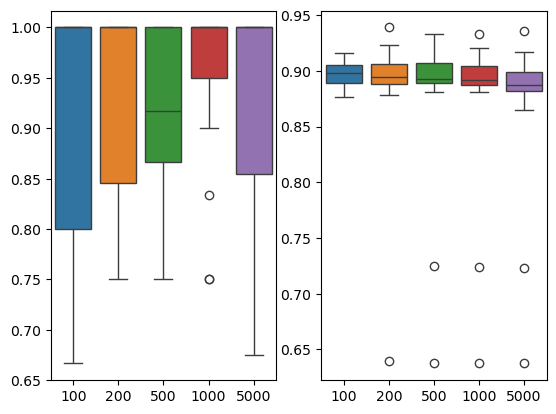

In [10]:
Plot_data_MCLC = {k: [] for k in MonteCarloSample}
Plot_data_MCLAUC = {k: [] for k in MonteCarloSample}

for seed, val in METRICS_MCL.items():
    for k, res in val.items():
        Plot_data_MCLC[k].append(res['Covering'])
        Plot_data_MCLAUC[k].append(res['AUC'])

fig, ax = plt.subplots(1,2)
sns.boxplot(Plot_data_MCLAUC,ax=ax[0])
sns.boxplot(Plot_data_MCLC,ax=ax[1])

In [11]:
WindowLength = [50]#,200]
Significance = [0.05]#,0.1,0.2]
Lookback = [50]#,0.8,0.5]
MonteCarloSample = [1000] #[200,1000,5000]
WassersteinOrder = [1,2,3,4,6]#[1,2,4]

METRICS_P = {}

for rs in data.keys():
    df = np.array(data[rs]['data']).astype(np.float32)
    GroundTruth = data[rs]['target']
    METRICS_P[rs] = {}

    print(GroundTruth)

    for combination in product(WindowLength,Significance,Lookback,MonteCarloSample,WassersteinOrder):
        print(combination)
        k,significance, lookack,L,p = combination
        print(k)
        METRICS_P[rs][p] = {}
        detector = SWDCP(data=df,window_length=k,max_history=lookack,significance=significance)
        start = time.time()
        detector.process_dataloader(p=p,n_theta=L,explanations=False,seed=2025, verbose=False)
        end = time.time()
        print(end-start)
        f1,cov, auc_score = detector.evaluate(GroundTruth,20)
        METRICS_P[rs][p]['F1'] = f1
        METRICS_P[rs][p]['Covering'] = cov
        METRICS_P[rs][p]['AUC'] = auc_score
        METRICS_P[rs][p]['cps'] = detector.change_points
        METRICS_P[rs][p]['RunTime'] = end-start

[200, 400]
(50, 0.05, 50, 1000, 1)
50


  0%|          | 0/551 [00:00<?, ?it/s]

100%|██████████| 551/551 [00:04<00:00, 116.58it/s]


4.727750062942505
F1 score: 0.6666666666666666
Covering: 0.8699670673191774
0.6666666666666666
(50, 0.05, 50, 1000, 2)
50


100%|██████████| 551/551 [00:04<00:00, 110.64it/s]


4.99251389503479
F1 score: 1.0
Covering: 0.884492389331099
1.0
(50, 0.05, 50, 1000, 3)
50


100%|██████████| 551/551 [00:06<00:00, 81.52it/s]


6.774670362472534
F1 score: 1.0
Covering: 0.884492389331099
1.0
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 551/551 [00:06<00:00, 79.53it/s]


6.928431987762451
F1 score: 1.0
Covering: 0.884492389331099
1.0
(50, 0.05, 50, 1000, 6)
50


100%|██████████| 551/551 [00:07<00:00, 77.37it/s]


7.138170003890991
F1 score: 1.0
Covering: 0.9112590530261673
1.0
[200, 400]
(50, 0.05, 50, 1000, 1)
50


100%|██████████| 551/551 [00:06<00:00, 79.82it/s]


6.907916784286499
F1 score: 0.8
Covering: 0.6284688995215311
0.8333333333333333
(50, 0.05, 50, 1000, 2)
50


100%|██████████| 551/551 [00:07<00:00, 75.55it/s]


7.295649766921997
F1 score: 0.8
Covering: 0.6355864197530865
0.8333333333333333
(50, 0.05, 50, 1000, 3)
50


100%|██████████| 551/551 [00:07<00:00, 77.70it/s]


7.091421604156494
F1 score: 0.8
Covering: 0.6374043592066848
0.8333333333333333
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 551/551 [00:07<00:00, 76.50it/s]


7.202920913696289
F1 score: 0.8
Covering: 0.6374043592066848
0.8333333333333333
(50, 0.05, 50, 1000, 6)
50


100%|██████████| 551/551 [00:07<00:00, 75.07it/s]


7.340264320373535
F1 score: 0.8
Covering: 0.6410876672611032
0.8333333333333333
[200, 400]
(50, 0.05, 50, 1000, 1)
50


100%|██████████| 551/551 [00:06<00:00, 79.05it/s]


6.970115423202515
F1 score: 0.8
Covering: 0.6337840658877887
0.8333333333333333
(50, 0.05, 50, 1000, 2)
50


100%|██████████| 551/551 [00:07<00:00, 76.63it/s]


7.192249059677124
F1 score: 1.0
Covering: 0.8992634828088829
1.0
(50, 0.05, 50, 1000, 3)
50


100%|██████████| 551/551 [00:06<00:00, 81.48it/s]


6.777660608291626
F1 score: 1.0
Covering: 0.9112461059190031
1.0
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 551/551 [00:06<00:00, 79.45it/s]


6.935098171234131
F1 score: 1.0
Covering: 0.9203417781321049
1.0
(50, 0.05, 50, 1000, 6)
50


100%|██████████| 551/551 [00:06<00:00, 78.74it/s]


6.997359275817871
F1 score: 1.0
Covering: 0.9388205361889572
1.0
[200, 400]
(50, 0.05, 50, 1000, 1)
50


100%|██████████| 551/551 [00:07<00:00, 72.60it/s]


7.589591979980469
F1 score: 0.6666666666666666
Covering: 0.8845219638242895
0.6666666666666666
(50, 0.05, 50, 1000, 2)
50


100%|██████████| 551/551 [00:07<00:00, 78.26it/s]


7.040967702865601
F1 score: 1.0
Covering: 0.9022407654650645
1.0
(50, 0.05, 50, 1000, 3)
50


100%|██████████| 551/551 [00:07<00:00, 73.62it/s]


7.483959913253784
F1 score: 1.0
Covering: 0.9112555322618217
1.0
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 551/551 [00:07<00:00, 73.72it/s]


7.489956855773926
F1 score: 1.0
Covering: 0.9112555322618217
1.0
(50, 0.05, 50, 1000, 6)
50


100%|██████████| 551/551 [00:07<00:00, 74.54it/s]


7.391918182373047
F1 score: 1.0
Covering: 0.9295357891584306
1.0
[200, 400]
(50, 0.05, 50, 1000, 1)
50


100%|██████████| 551/551 [00:06<00:00, 82.20it/s]


6.703149318695068
F1 score: 0.8
Covering: 0.6320611916264091
0.8333333333333333
(50, 0.05, 50, 1000, 2)
50


100%|██████████| 551/551 [00:06<00:00, 80.22it/s]


6.869213104248047
F1 score: 1.0
Covering: 0.908330144788904
1.0
(50, 0.05, 50, 1000, 3)
50


100%|██████████| 551/551 [00:06<00:00, 80.64it/s]


6.83629298210144
F1 score: 1.0
Covering: 0.9265105307874615
1.0
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 551/551 [00:07<00:00, 78.68it/s]


7.0071961879730225
F1 score: 1.0
Covering: 0.9326685325628987
1.0
(50, 0.05, 50, 1000, 6)
50


100%|██████████| 551/551 [00:07<00:00, 74.49it/s]


7.399253606796265
F1 score: 1.0
Covering: 0.9482370164894436
1.0
[200, 400, 600]
(50, 0.05, 50, 1000, 1)
50


100%|██████████| 751/751 [00:08<00:00, 88.18it/s] 


8.517889499664307
F1 score: 0.5714285714285715
Covering: 0.682213820963821
0.5833333333333333
(50, 0.05, 50, 1000, 2)
50


100%|██████████| 751/751 [00:06<00:00, 120.01it/s]


6.259728908538818
F1 score: 0.75
Covering: 0.6950580737615506
0.75
(50, 0.05, 50, 1000, 3)
50


100%|██████████| 751/751 [00:06<00:00, 119.27it/s]


6.2968573570251465
F1 score: 0.75
Covering: 0.8810739675016928
0.75
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 112.13it/s]


6.697383880615234
F1 score: 0.75
Covering: 0.8810739675016928
0.75
(50, 0.05, 50, 1000, 6)
50


100%|██████████| 751/751 [00:06<00:00, 111.51it/s]


6.7346861362457275
F1 score: 0.75
Covering: 0.894291727388798
0.75
[200, 400, 600]
(50, 0.05, 50, 1000, 1)
50


100%|██████████| 751/751 [00:06<00:00, 118.68it/s]


6.3296730518341064
F1 score: 0.8571428571428571
Covering: 0.6710526315789473
0.875
(50, 0.05, 50, 1000, 2)
50


100%|██████████| 751/751 [00:06<00:00, 117.65it/s]


6.383250713348389
F1 score: 0.8571428571428571
Covering: 0.6868236714975845
0.875
(50, 0.05, 50, 1000, 3)
50


100%|██████████| 751/751 [00:06<00:00, 115.67it/s]


6.492838382720947
F1 score: 0.888888888888889
Covering: 0.8914766002713246
0.9
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 112.58it/s]


6.671822547912598
F1 score: 1.0
Covering: 0.9004041707032482
1.0
(50, 0.05, 50, 1000, 6)
50


100%|██████████| 751/751 [00:06<00:00, 113.14it/s]


6.639596939086914
F1 score: 1.0
Covering: 0.923070774166201
1.0
[200, 400, 600]
(50, 0.05, 50, 1000, 1)
50


100%|██████████| 751/751 [00:06<00:00, 119.03it/s]


6.312633037567139
F1 score: 0.8571428571428571
Covering: 0.6817591507772875
0.875
(50, 0.05, 50, 1000, 2)
50


100%|██████████| 751/751 [00:06<00:00, 116.63it/s]


6.448859453201294
F1 score: 1.0
Covering: 0.8806622425808474
1.0
(50, 0.05, 50, 1000, 3)
50


100%|██████████| 751/751 [00:06<00:00, 113.60it/s]


6.610668420791626
F1 score: 0.888888888888889
Covering: 0.8767784950860801
0.9
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 114.74it/s]


6.547858476638794
F1 score: 1.0
Covering: 0.8940539919513603
1.0
(50, 0.05, 50, 1000, 6)
50


100%|██████████| 751/751 [00:06<00:00, 118.72it/s]


6.326967716217041
F1 score: 1.0
Covering: 0.9192108636461951
1.0
[200, 400, 600]
(50, 0.05, 50, 1000, 1)
50


100%|██████████| 751/751 [00:06<00:00, 116.05it/s]


6.4741504192352295
F1 score: 0.5
Covering: 0.850718399247811
0.5
(50, 0.05, 50, 1000, 2)
50


100%|██████████| 751/751 [00:06<00:00, 121.52it/s]


6.180282354354858
F1 score: 0.75
Covering: 0.8720450351356424
0.75
(50, 0.05, 50, 1000, 3)
50


100%|██████████| 751/751 [00:06<00:00, 116.59it/s]


6.441631078720093
F1 score: 1.0
Covering: 0.8852094346853788
1.0
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 116.24it/s]


6.4609410762786865
F1 score: 1.0
Covering: 0.8895717232879649
1.0
(50, 0.05, 50, 1000, 6)
50


100%|██████████| 751/751 [00:06<00:00, 110.54it/s]


6.793697357177734
F1 score: 1.0
Covering: 0.9121008398094237
1.0
[200, 400, 600]
(50, 0.05, 50, 1000, 1)
50


100%|██████████| 751/751 [00:06<00:00, 123.37it/s]


6.090625047683716
F1 score: 0.5714285714285715
Covering: 0.6875054187831108
0.5833333333333333
(50, 0.05, 50, 1000, 2)
50


100%|██████████| 751/751 [00:06<00:00, 122.26it/s]


6.14368200302124
F1 score: 0.75
Covering: 0.8769234436965067
0.75
(50, 0.05, 50, 1000, 3)
50


100%|██████████| 751/751 [00:06<00:00, 123.74it/s]


6.070588827133179
F1 score: 0.75
Covering: 0.887908274745413
0.75
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 115.73it/s]


6.4893083572387695
F1 score: 0.75
Covering: 0.8901308893944023
0.75
(50, 0.05, 50, 1000, 6)
50


100%|██████████| 751/751 [00:06<00:00, 113.84it/s]


6.596935987472534
F1 score: 1.0
Covering: 0.914839249080613
1.0
[200, 400, 600, 800]
(50, 0.05, 50, 1000, 1)
50


100%|██████████| 951/951 [00:07<00:00, 119.18it/s]


7.9814019203186035
F1 score: 0.7499999999999999
Covering: 0.5574576338928856
0.8
(50, 0.05, 50, 1000, 2)
50


100%|██████████| 951/951 [00:08<00:00, 109.09it/s]


8.717608451843262
F1 score: 0.6
Covering: 0.7169168204209911
0.6
(50, 0.05, 50, 1000, 3)
50


100%|██████████| 951/951 [00:07<00:00, 119.24it/s]


7.975218296051025
F1 score: 0.6666666666666665
Covering: 0.7219162757709794
0.675
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 951/951 [00:08<00:00, 115.64it/s]


8.230088472366333
F1 score: 0.888888888888889
Covering: 0.7236735619152913
0.9
(50, 0.05, 50, 1000, 6)
50


100%|██████████| 951/951 [00:08<00:00, 114.29it/s]


8.322527170181274
F1 score: 0.888888888888889
Covering: 0.7293506121720591
0.9
[200, 400, 600, 800]
(50, 0.05, 50, 1000, 1)
50


100%|██████████| 951/951 [00:08<00:00, 118.37it/s]


8.035648584365845
F1 score: 0.6666666666666665
Covering: 0.7171958922657792
0.675
(50, 0.05, 50, 1000, 2)
50


100%|██████████| 951/951 [00:07<00:00, 123.27it/s]


7.714929103851318
F1 score: 0.6
Covering: 0.8670661358039013
0.6
(50, 0.05, 50, 1000, 3)
50


100%|██████████| 951/951 [00:08<00:00, 115.47it/s]


8.236058473587036
F1 score: 0.8000000000000002
Covering: 0.8826296529959127
0.8
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 951/951 [00:08<00:00, 112.81it/s]


8.430164098739624
F1 score: 1.0
Covering: 0.8914181417498702
1.0
(50, 0.05, 50, 1000, 6)
50


100%|██████████| 951/951 [00:08<00:00, 115.55it/s]


8.236275672912598
F1 score: 1.0
Covering: 0.9022018893349826
1.0
[200, 400, 600, 800]
(50, 0.05, 50, 1000, 1)
50


100%|██████████| 951/951 [00:08<00:00, 113.90it/s]


8.351220846176147
F1 score: 0.6666666666666665
Covering: 0.7143637487261848
0.675
(50, 0.05, 50, 1000, 2)
50


100%|██████████| 951/951 [00:07<00:00, 122.30it/s]


7.775902271270752
F1 score: 0.8000000000000002
Covering: 0.8719219742316302
0.8
(50, 0.05, 50, 1000, 3)
50


100%|██████████| 951/951 [00:08<00:00, 117.63it/s]


8.090493440628052
F1 score: 0.9090909090909091
Covering: 0.8732471971761434
0.9166666666666667
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 951/951 [00:08<00:00, 116.96it/s]


8.131020069122314
F1 score: 1.0
Covering: 0.8895615843926294
1.0
(50, 0.05, 50, 1000, 6)
50


100%|██████████| 951/951 [00:08<00:00, 117.63it/s]


8.08439040184021
F1 score: 1.0
Covering: 0.9073425350816656
1.0
[200, 400, 600, 800]
(50, 0.05, 50, 1000, 1)
50


100%|██████████| 951/951 [00:07<00:00, 121.34it/s]


7.840677261352539
F1 score: 0.888888888888889
Covering: 0.716652634089867
0.9
(50, 0.05, 50, 1000, 2)
50


100%|██████████| 951/951 [00:08<00:00, 114.46it/s]


8.311967372894287
F1 score: 0.8000000000000002
Covering: 0.8802070005212113
0.8
(50, 0.05, 50, 1000, 3)
50


100%|██████████| 951/951 [00:07<00:00, 119.70it/s]


7.951120615005493
F1 score: 0.8000000000000002
Covering: 0.887164133627544
0.8
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 951/951 [00:08<00:00, 116.08it/s]


8.198854446411133
F1 score: 1.0
Covering: 0.8960808774890625
1.0
(50, 0.05, 50, 1000, 6)
50


100%|██████████| 951/951 [00:08<00:00, 110.30it/s]


8.622253656387329
F1 score: 1.0
Covering: 0.9178076834598573
1.0
[200, 400, 600, 800]
(50, 0.05, 50, 1000, 1)
50


100%|██████████| 951/951 [00:07<00:00, 125.19it/s]


7.598794221878052
F1 score: 1.0
Covering: 0.873391795452064
1.0
(50, 0.05, 50, 1000, 2)
50


100%|██████████| 951/951 [00:07<00:00, 122.13it/s]


7.788700342178345
F1 score: 1.0
Covering: 0.8945056661739559
1.0
(50, 0.05, 50, 1000, 3)
50


100%|██████████| 951/951 [00:08<00:00, 117.63it/s]


8.100306987762451
F1 score: 1.0
Covering: 0.9034493462843047
1.0
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 951/951 [00:08<00:00, 115.91it/s]


8.204368591308594
F1 score: 1.0
Covering: 0.9089175641046217
1.0
(50, 0.05, 50, 1000, 6)
50


100%|██████████| 951/951 [00:08<00:00, 117.19it/s]

8.115678310394287
F1 score: 0.7142857142857143
Covering: 0.8645718432510886
0.7777777777777778


<Axes: >

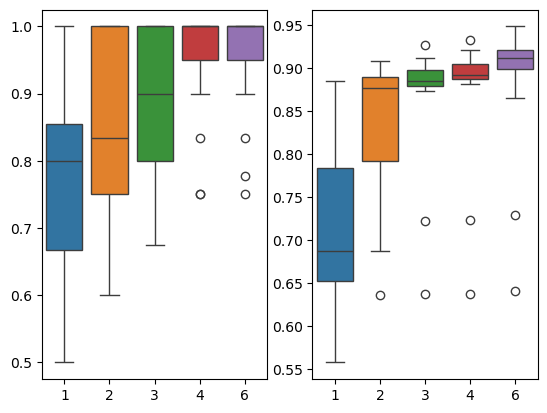

In [12]:
Plot_data_PC = {k: [] for k in WassersteinOrder}
Plot_data_PAUC = {k: [] for k in WassersteinOrder}

for seed, val in METRICS_P.items():
    for k, res in val.items():
        Plot_data_PC[k].append(res['Covering'])
        Plot_data_PAUC[k].append(res['AUC'])

fig, ax = plt.subplots(1,2)
sns.boxplot(Plot_data_PAUC,ax=ax[0])
sns.boxplot(Plot_data_PC,ax=ax[1])

In [13]:
WindowLength = [50]#,200]
Significance = [0.01,0.05,0.1,0.2]#,0.1,0.2]
Lookback = [50]#,0.8,0.5]
MonteCarloSample = [1000] #[200,1000,5000]
WassersteinOrder = [4]#[1,2,4]

METRICS_Sig = {}

for rs in data.keys():
    df = np.array(data[rs]['data']).astype(np.float32)
    GroundTruth = data[rs]['target']
    METRICS_Sig[rs] = {}

    print(GroundTruth)

    for combination in product(WindowLength,Significance,Lookback,MonteCarloSample,WassersteinOrder):
        print(combination)
        k,significance, lookack,L,p = combination
        print(k)
        METRICS_Sig[rs][significance] = {}
        detector = SWDCP(data=df,window_length=k,max_history=lookack,significance=significance)
        start = time.time()
        detector.process_dataloader(p=p,n_theta=L,explanations=False,seed=2025,verbose=False)
        end = time.time()
        print(end-start)
        f1,cov, auc_score = detector.evaluate(GroundTruth,20)
        METRICS_Sig[rs][significance]['F1'] = f1
        METRICS_Sig[rs][significance]['Covering'] = cov
        METRICS_Sig[rs][significance]['AUC'] = auc_score
        METRICS_Sig[rs][significance]['cps'] = detector.change_points
        METRICS_Sig[rs][significance]['RunTime'] = end-start

[200, 400]
(50, 0.01, 50, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 114.50it/s]


4.813325881958008
F1 score: 0.8
Covering: 0.6284688995215311
0.8333333333333333
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 111.13it/s]


4.958327293395996
F1 score: 1.0
Covering: 0.884492389331099
1.0
(50, 0.1, 50, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 110.47it/s]


4.987817049026489
F1 score: 1.0
Covering: 0.9082319061073679
1.0
(50, 0.2, 50, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 110.89it/s]


4.968735933303833
F1 score: 0.35294117647058826
Covering: 0.4716264090177134
0.6071428571428571
[200, 400]
(50, 0.01, 50, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 116.59it/s]


4.726056098937988
F1 score: 0.4
Covering: 0.6250004766671433
0.4166666666666667
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 112.93it/s]


4.894707679748535
F1 score: 0.8
Covering: 0.6374043592066848
0.8333333333333333
(50, 0.1, 50, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 112.53it/s]


4.9206743240356445
F1 score: 1.0
Covering: 0.9053391053391052
1.0
(50, 0.2, 50, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 116.69it/s]


4.724619626998901
F1 score: 0.2608695652173913
Covering: 0.53
0.575
[200, 400]
(50, 0.01, 50, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 120.68it/s]


4.565777778625488
F1 score: 0.6666666666666666
Covering: 0.8786793445164147
0.6666666666666666
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 113.19it/s]


4.8739683628082275
F1 score: 1.0
Covering: 0.9203417781321049
1.0
(50, 0.1, 50, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 116.65it/s]


4.725557565689087
F1 score: 1.0
Covering: 0.945069009937431
1.0
(50, 0.2, 50, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 112.95it/s]


4.878208160400391
F1 score: 0.5
Covering: 0.705
0.6666666666666666
[200, 400]
(50, 0.01, 50, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 117.91it/s]


4.674792766571045
F1 score: 0.6666666666666666
Covering: 0.8670925744727115
0.6666666666666666
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 117.12it/s]


4.705511093139648
F1 score: 1.0
Covering: 0.9112555322618217
1.0
(50, 0.1, 50, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 117.16it/s]


4.702887773513794
F1 score: 1.0
Covering: 0.9295357891584306
1.0
(50, 0.2, 50, 1000, 4)
50


100%|██████████| 551/551 [00:05<00:00, 109.81it/s]


5.02431058883667
F1 score: 0.3157894736842105
Covering: 0.58
0.59375
[200, 400]
(50, 0.01, 50, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 114.14it/s]


4.831195592880249
F1 score: 0.6666666666666666
Covering: 0.8905888823081479
0.6666666666666666
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 119.45it/s]


4.61390233039856
F1 score: 1.0
Covering: 0.9326685325628987
1.0
(50, 0.1, 50, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 121.36it/s]


4.541016101837158
F1 score: 1.0
Covering: 0.9545257654966393
1.0
(50, 0.2, 50, 1000, 4)
50


100%|██████████| 551/551 [00:04<00:00, 120.79it/s]


4.562784671783447
F1 score: 0.4
Covering: 0.6651307189542484
0.625
[200, 400, 600]
(50, 0.01, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 121.43it/s]


6.18743634223938
F1 score: 0.5714285714285715
Covering: 0.6776345413766055
0.5833333333333333
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 117.83it/s]


6.375590562820435
F1 score: 0.75
Covering: 0.8810739675016928
0.75
(50, 0.1, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 116.58it/s]


6.442004919052124
F1 score: 0.75
Covering: 0.9032193929821566
0.75
(50, 0.2, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 119.06it/s]


6.30893349647522
F1 score: 0.34782608695652173
Covering: 0.48833333333333334
0.6052631578947368
[200, 400, 600]
(50, 0.01, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 120.43it/s]


6.238128662109375
F1 score: 0.5714285714285715
Covering: 0.6683892345582992
0.5833333333333333
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 119.84it/s]


6.266663312911987
F1 score: 1.0
Covering: 0.9004041707032482
1.0
(50, 0.1, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 113.32it/s]


6.62739372253418
F1 score: 1.0
Covering: 0.9278107527753019
1.0
(50, 0.2, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 119.71it/s]


6.276397228240967
F1 score: 0.32
Covering: 0.6477032019704433
0.5952380952380952
[200, 400, 600]
(50, 0.01, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 119.23it/s]


6.301880836486816
F1 score: 0.8571428571428571
Covering: 0.6780712678333443
0.875
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 118.37it/s]


6.345479249954224
F1 score: 1.0
Covering: 0.8940539919513603
1.0
(50, 0.1, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 118.17it/s]


6.357624769210815
F1 score: 1.0
Covering: 0.9166227670433833
1.0
(50, 0.2, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 122.68it/s]


6.121995687484741
F1 score: 0.38095238095238093
Covering: 0.6611078199052133
0.6176470588235294
[200, 400, 600]
(50, 0.01, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 119.81it/s]


6.269302606582642
F1 score: 0.5
Covering: 0.6648084973695226
0.5
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 119.94it/s]


6.262534856796265
F1 score: 1.0
Covering: 0.8895717232879649
1.0
(50, 0.1, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 122.05it/s]


6.154191017150879
F1 score: 0.888888888888889
Covering: 0.8860818052971919
0.9
(50, 0.2, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 117.67it/s]


6.383513450622559
F1 score: 0.4
Covering: 0.7141868932038835
0.625
[200, 400, 600]
(50, 0.01, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 119.18it/s]


6.302232503890991
F1 score: 0.5714285714285715
Covering: 0.6839207970090004
0.5833333333333333
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 120.63it/s]


6.2274181842803955
F1 score: 0.75
Covering: 0.8901308893944023
0.75
(50, 0.1, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 122.18it/s]


6.148500442504883
F1 score: 1.0
Covering: 0.9214748677248675
1.0
(50, 0.2, 50, 1000, 4)
50


100%|██████████| 751/751 [00:06<00:00, 120.19it/s]


6.249655485153198
F1 score: 0.4444444444444445
Covering: 0.6825
0.6428571428571428
[200, 400, 600, 800]
(50, 0.01, 50, 1000, 4)
50


100%|██████████| 951/951 [00:08<00:00, 111.65it/s]


8.52186131477356
F1 score: 0.7499999999999999
Covering: 0.5523134502853614
0.8
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 951/951 [00:07<00:00, 121.80it/s]


7.808747291564941
F1 score: 0.888888888888889
Covering: 0.7236735619152913
0.9
(50, 0.1, 50, 1000, 4)
50


100%|██████████| 951/951 [00:07<00:00, 119.97it/s]


7.945322275161743
F1 score: 1.0
Covering: 0.9012924403702063
1.0
(50, 0.2, 50, 1000, 4)
50


100%|██████████| 951/951 [00:08<00:00, 116.99it/s]


8.129862308502197
F1 score: 0.45454545454545453
Covering: 0.726432793407218
0.6470588235294118
[200, 400, 600, 800]
(50, 0.01, 50, 1000, 4)
50


100%|██████████| 951/951 [00:07<00:00, 119.66it/s]


7.948342800140381
F1 score: 0.6666666666666665
Covering: 0.7217931064620475
0.675
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 951/951 [00:08<00:00, 118.79it/s]


8.007632493972778
F1 score: 1.0
Covering: 0.8914181417498702
1.0
(50, 0.1, 50, 1000, 4)
50


100%|██████████| 951/951 [00:08<00:00, 117.54it/s]


8.09087061882019
F1 score: 1.0
Covering: 0.9144752013135312
1.0
(50, 0.2, 50, 1000, 4)
50


100%|██████████| 951/951 [00:08<00:00, 114.99it/s]


8.272430658340454
F1 score: 0.4347826086956522
Covering: 0.7138232729158319
0.6388888888888888
[200, 400, 600, 800]
(50, 0.01, 50, 1000, 4)
50


100%|██████████| 951/951 [00:08<00:00, 118.47it/s]


8.030470848083496
F1 score: 0.6666666666666665
Covering: 0.7203914494617588
0.675
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 951/951 [00:07<00:00, 119.96it/s]


7.929917097091675
F1 score: 1.0
Covering: 0.8895615843926294
1.0
(50, 0.1, 50, 1000, 4)
50


100%|██████████| 951/951 [00:08<00:00, 117.26it/s]


8.112245082855225
F1 score: 0.9090909090909091
Covering: 0.8861349554089695
0.9166666666666667
(50, 0.2, 50, 1000, 4)
50


100%|██████████| 951/951 [00:07<00:00, 120.70it/s]


7.878854513168335
F1 score: 0.37037037037037035
Covering: 0.6578341232227488
0.6136363636363636
[200, 400, 600, 800]
(50, 0.01, 50, 1000, 4)
50


100%|██████████| 951/951 [00:08<00:00, 118.87it/s]


8.002492904663086
F1 score: 0.888888888888889
Covering: 0.714599176909051
0.9
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 951/951 [00:08<00:00, 108.02it/s]


8.806406736373901
F1 score: 1.0
Covering: 0.8960808774890625
1.0
(50, 0.1, 50, 1000, 4)
50


100%|██████████| 951/951 [00:08<00:00, 108.47it/s]


8.767568588256836
F1 score: 1.0
Covering: 0.9232763148800884
1.0
(50, 0.2, 50, 1000, 4)
50


100%|██████████| 951/951 [00:08<00:00, 117.11it/s]


8.121759176254272
F1 score: 0.37037037037037035
Covering: 0.661
0.6136363636363636
[200, 400, 600, 800]
(50, 0.01, 50, 1000, 4)
50


100%|██████████| 951/951 [00:07<00:00, 119.45it/s]


7.963547706604004
F1 score: 0.8000000000000002
Covering: 0.7162959118792843
0.8
(50, 0.05, 50, 1000, 4)
50


100%|██████████| 951/951 [00:08<00:00, 118.38it/s]


8.046602249145508
F1 score: 1.0
Covering: 0.9089175641046217
1.0
(50, 0.1, 50, 1000, 4)
50


100%|██████████| 951/951 [00:08<00:00, 114.84it/s]


8.282798051834106
F1 score: 0.7142857142857143
Covering: 0.8850666612154787
0.7777777777777778
(50, 0.2, 50, 1000, 4)
50


100%|██████████| 951/951 [00:08<00:00, 117.16it/s]

8.118110179901123
F1 score: 0.32258064516129037
Covering: 0.656368932038835
0.5961538461538461


<Axes: >

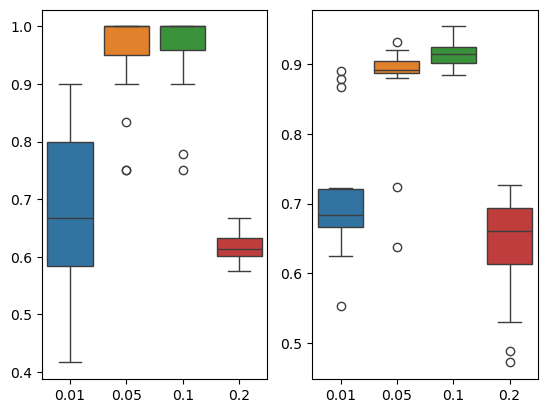

In [14]:
Plot_data_SigC = {k: [] for k in Significance}
Plot_data_SigAUC = {k: [] for k in Significance}

for seed, val in METRICS_Sig.items():
    for k, res in val.items():
        Plot_data_SigC[k].append(res['Covering'])
        Plot_data_SigAUC[k].append(res['AUC'])

fig, ax = plt.subplots(1,2)
sns.boxplot(Plot_data_SigAUC,ax=ax[0])
sns.boxplot(Plot_data_SigC,ax=ax[1])

C:\Users\Sven Jacob\AppData\Local\Temp\ipykernel_29756\2128631948.py:28: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.boxplot(Plot_data_SigAUC,ax=ax[0,4],**args)
C:\Users\Sven Jacob\AppData\Local\Temp\ipykernel_29756\2128631948.py:29: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.boxplot(Plot_data_SigC,ax=ax[1,4],**args)


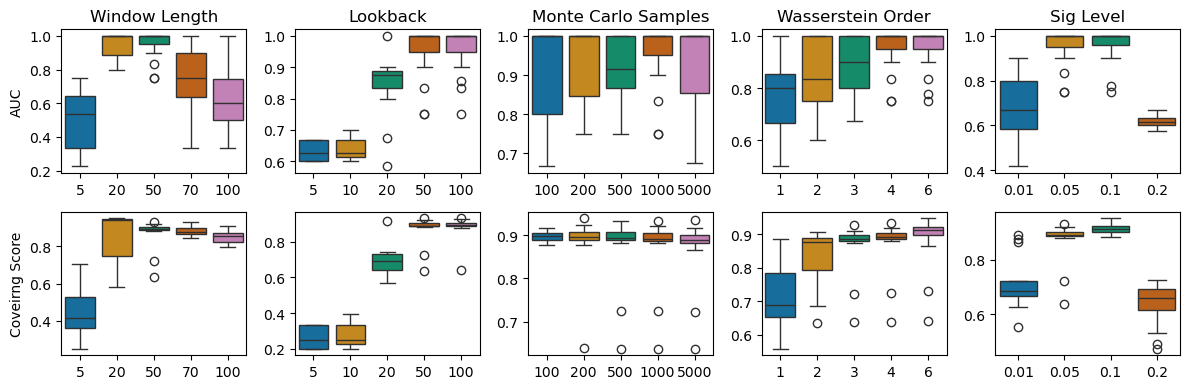

In [16]:
from matplotlib.pyplot import Rectangle

fig, ax = plt.subplots(2,5,figsize=(12,4))

#sns.color_palette("colorblind")
args ={'palette':sns.color_palette("colorblind",n_colors=5)}
   
ax[0,0].set_title('Window Length')
ax[0,0].set_ylabel('AUC')
ax[1,0].set_ylabel('Coveirng Score')
sns.boxplot(Plot_data_WAUC,ax=ax[0,0],**args)
sns.boxplot(Plot_data_WC,ax=ax[1,0],**args)

ax[0,1].set_title('Lookback')
sns.boxplot(Plot_data_LookbackAUC,ax=ax[0,1],**args)
sns.boxplot(Plot_data_LookbackC,ax=ax[1,1],**args)


ax[0,2].set_title('Monte Carlo Samples')
sns.boxplot(Plot_data_MCLAUC,ax=ax[0,2],**args)
sns.boxplot(Plot_data_MCLC,ax=ax[1,2],**args)

ax[0,3].set_title('Wasserstein Order')
sns.boxplot(Plot_data_PAUC,ax=ax[0,3],**args)
sns.boxplot(Plot_data_PC,ax=ax[1,3],**args)

ax[0,4].set_title('Sig Level')
sns.boxplot(Plot_data_SigAUC,ax=ax[0,4],**args)
sns.boxplot(Plot_data_SigC,ax=ax[1,4],**args)

fig.tight_layout()

fig.savefig('AblationMNIST.pdf')

<Axes: >

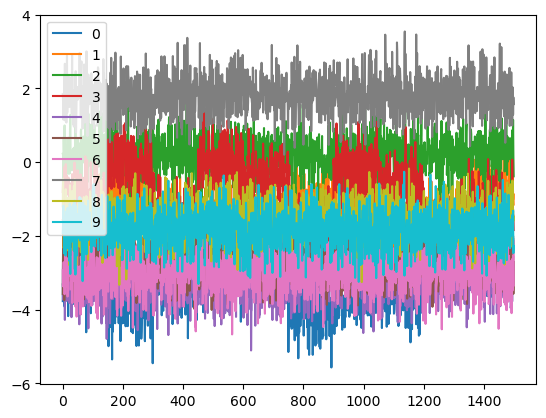

In [3]:
def make_dynamic_blobs(n_samples, base_center, n_clusters, varying_features, 
                       cluster_std=1.0, center_offset_range=(-5, 5), random_state=None):
    """
    Generate synthetic data with dynamic centers based on a base center and random offsets.
    
    Parameters:
        n_samples: int
            Total number of samples.
        base_center: array-like
            The center of the first cluster. Shape: (n_features,).
        n_clusters: int
            Number of clusters to generate.
        varying_features: list of int
            Indices of features that should vary across clusters.
        cluster_std: float
            Standard deviation of clusters.
        center_offset_range: tuple
            Range (min, max) for random uniform offsets added to the base center for varying features.
        random_state: int or None
            Random seed for reproducibility.
    
    Returns:
        X: ndarray of shape (n_samples, n_features)
            The generated samples.
        y: ndarray of shape (n_samples,)
            The integer labels for cluster membership.
    """
    if random_state is not None:
        np.random.seed(random_state)
    
    n_features = len(base_center)
    samples_per_cluster = n_samples // n_clusters
    remainder = n_samples % n_clusters

    # Generate cluster centers
    centers = [np.array(base_center,dtype=float)]
    for _ in range(1, n_clusters):
        new_center = centers[0].copy()  # Start with the base center
        for feature in varying_features:
            #tmp = np.random.uniform(*center_offset_range)
            #print("offset:",tmp)
            #print(new_center[feature]+tmp)
            new_center[feature] +=  np.random.uniform(*center_offset_range)
            #print(new_center[feature])
            
        centers.append(new_center)
    centers = np.array(centers)
   # print(centers)
    
    # Generate points for each cluster
    X = []
    y = []
    for cluster_idx, center in enumerate(centers):
        cluster_size = samples_per_cluster + (1 if cluster_idx < remainder else 0)
        cluster_points = np.random.normal(
            loc=center,
            scale=cluster_std,
            size=(cluster_size, n_features)
        )
        X.append(cluster_points)
        y.extend([cluster_idx] * cluster_size)
    
    X = np.vstack(X)
    y = np.array(y)
    
    return X.astype(np.float32), y, centers

# Example Usage
base_center = list(np.random.uniform(-4,4,10))#,0,0,0,0]  # Base center for the first cluster
n_clusters = 10
n_samples = 1500
varying_features = [0,1,3]#[0,5,3]#, 1,4,5,6]  # Only the first two features vary
X, y, centers = make_dynamic_blobs(
    n_samples=n_samples, 
    base_center=base_center, 
    n_clusters=n_clusters, 
    varying_features=varying_features, 
    cluster_std=0.5, 
    center_offset_range=(-1, 1), 
    random_state=2025
)

fig, ax = plt.subplots()
pd.DataFrame(X).plot(ax=ax,legend=True)

In [6]:
from itertools import product
import time as time
WindowLength = [50]#,200]
Significance = [0.05,0.1,0.2,0.25]#,0.1,0.2]
Lookback = [20]#,0.8,0.5]
MonteCarloSample = [1000] #[200,1000,5000]
WassersteinOrder = [2]#[1,2,4]

METRICS_SYNP = {}



RANDOM_STATES = [2020,2021,2022,2023,2024,2025,2026,2027,2028,2029]


for rs in RANDOM_STATES:
    X, y, centers = make_dynamic_blobs(
        n_samples=n_samples, 
        base_center=base_center, 
        n_clusters=n_clusters, 
        varying_features=varying_features, 
        cluster_std=0.25, 
        center_offset_range=(-1.0, 1.0), 
        random_state=rs
    )
    df,GroundTruth = X, np.where(np.diff(y)!=0)[0]+1
    METRICS_SYNP[rs] = {}

    print(GroundTruth)

    for combination in product(WindowLength,Significance,Lookback,MonteCarloSample,WassersteinOrder):
        print(combination)
        k,significance, lookack,L,p = combination
        print(k)
        METRICS_SYNP[rs][significance] = {}
        detector = SWDCP(data=df,window_length=k,max_history=k,significance=significance)
        start = time.time()
        detector.process_dataloader(p=p,n_theta=L,explanations=False,seed=2025,verbose=False)
        end = time.time()
        print(end-start)
        f1,cov, auc_score = detector.evaluate(GroundTruth,20)
        METRICS_SYNP[rs][significance]['F1'] = f1
        METRICS_SYNP[rs][significance]['Covering'] = cov
        METRICS_SYNP[rs][significance]['AUC'] = auc_score
        METRICS_SYNP[rs][significance]['cps'] = detector.change_points
        METRICS_SYNP[rs][significance]['RunTime'] = end-start



[ 150  300  450  600  750  900 1050 1200 1350]
(50, 0.05, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:06<00:00, 231.35it/s]


7.653516530990601
F1 score: 0.761904761904762
Covering: 0.8826933548546957
0.7636363636363637
(50, 0.1, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:12<00:00, 119.28it/s]


12.171630620956421
F1 score: 0.8181818181818182
Covering: 0.891791016017825
0.825
(50, 0.2, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:12<00:00, 117.02it/s]


12.405755519866943
F1 score: 0.6666666666666666
Covering: 0.7778591460271189
0.75
(50, 0.25, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:12<00:00, 120.86it/s]


12.008201599121094
F1 score: 0.4444444444444445
Covering: 0.5942295805739515
0.6428571428571428
[ 150  300  450  600  750  900 1050 1200 1350]
(50, 0.05, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:12<00:00, 120.08it/s]


12.084258079528809
F1 score: 1.0
Covering: 0.9186676248944987
1.0
(50, 0.1, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:11<00:00, 122.23it/s]


11.87208366394043
F1 score: 0.9090909090909091
Covering: 0.9292347083329563
0.9166666666666667
(50, 0.2, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:11<00:00, 122.37it/s]


11.858381748199463
F1 score: 0.625
Covering: 0.8208199185797241
0.7272727272727273
(50, 0.25, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:13<00:00, 109.73it/s]


13.230452537536621
F1 score: 0.47619047619047616
Covering: 0.7626666666666667
0.65625
[ 150  300  450  600  750  900 1050 1200 1350]
(50, 0.05, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:12<00:00, 115.34it/s]


12.582526445388794
F1 score: 1.0
Covering: 0.9123461448465735
1.0
(50, 0.1, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:13<00:00, 109.27it/s]


13.286188125610352
F1 score: 0.9523809523809523
Covering: 0.9027819507600717
0.9545454545454546
(50, 0.2, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:14<00:00, 102.49it/s]


14.156954288482666
F1 score: 0.625
Covering: 0.8057445954583051
0.7272727272727273
(50, 0.25, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:13<00:00, 106.20it/s]


13.662540197372437
F1 score: 0.4255319148936171
Covering: 0.6932841896252172
0.6351351351351351
[ 150  300  450  600  750  900 1050 1200 1350]
(50, 0.05, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:12<00:00, 117.06it/s]


12.396684408187866
F1 score: 0.8333333333333333
Covering: 0.8690813122511257
0.8571428571428572
(50, 0.1, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:11<00:00, 122.45it/s]


11.856008768081665
F1 score: 0.8
Covering: 0.8770310198644586
0.8333333333333333
(50, 0.2, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:12<00:00, 113.36it/s]


12.801299571990967
F1 score: 0.5714285714285715
Covering: 0.7918910664706843
0.7
(50, 0.25, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:12<00:00, 118.31it/s]


12.268120288848877
F1 score: 0.3636363636363636
Covering: 0.6626666666666666
0.6111111111111112
[ 150  300  450  600  750  900 1050 1200 1350]
(50, 0.05, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:10<00:00, 143.07it/s]


10.14220380783081
F1 score: 1.0
Covering: 0.9240472093184879
1.0
(50, 0.1, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:15<00:00, 95.68it/s] 


15.165704250335693
F1 score: 0.8333333333333333
Covering: 0.94334857714841
0.8571428571428572
(50, 0.2, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:14<00:00, 97.17it/s] 


14.932451009750366
F1 score: 0.6666666666666666
Covering: 0.8975982883156115
0.75
(50, 0.25, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:15<00:00, 95.26it/s] 


15.232033014297485
F1 score: 0.5882352941176471
Covering: 0.7404398131402479
0.7083333333333334
[ 150  300  450  600  750  900 1050 1200 1350]
(50, 0.05, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:15<00:00, 91.10it/s] 


15.94402289390564
F1 score: 0.9523809523809523
Covering: 0.9236053280484591
0.9545454545454546
(50, 0.1, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:15<00:00, 94.02it/s] 


15.432846069335938
F1 score: 0.8333333333333333
Covering: 0.8672478915568369
0.8571428571428572
(50, 0.2, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:14<00:00, 99.60it/s] 


14.56893277168274
F1 score: 0.625
Covering: 0.7428492822966508
0.7272727272727273
(50, 0.25, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:14<00:00, 97.46it/s] 


14.888298511505127
F1 score: 0.5
Covering: 0.6873684791448821
0.6666666666666666
[ 150  300  450  600  750  900 1050 1200 1350]
(50, 0.05, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:15<00:00, 96.07it/s] 


15.103797674179077
F1 score: 0.9473684210526316
Covering: 0.8494387893521832
0.95
(50, 0.1, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:15<00:00, 91.95it/s] 


15.779817581176758
F1 score: 0.9473684210526316
Covering: 0.8581085209173589
0.95
(50, 0.2, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:15<00:00, 93.95it/s] 


15.444183349609375
F1 score: 0.5555555555555556
Covering: 0.7348747346072186
0.6923076923076923
(50, 0.25, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:14<00:00, 98.65it/s] 


14.723942756652832
F1 score: 0.47619047619047616
Covering: 0.6747153479725805
0.65625
[ 150  300  450  600  750  900 1050 1200 1350]
(50, 0.05, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:15<00:00, 96.30it/s] 


15.08295464515686
F1 score: 0.8421052631578948
Covering: 0.8248602392082195
0.8444444444444444
(50, 0.1, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:15<00:00, 92.43it/s]


15.698095321655273
F1 score: 0.8181818181818182
Covering: 0.8648053417349899
0.825
(50, 0.2, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:14<00:00, 101.22it/s]


14.334751605987549
F1 score: 0.5555555555555556
Covering: 0.778609676364825
0.6923076923076923
(50, 0.25, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:14<00:00, 96.81it/s] 


15.001054525375366
F1 score: 0.3571428571428571
Covering: 0.6456754385964912
0.6086956521739131
[ 150  300  450  600  750  900 1050 1200 1350]
(50, 0.05, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:17<00:00, 83.61it/s] 


17.35460352897644
F1 score: 0.9473684210526316
Covering: 0.8124706861311776
0.95
(50, 0.1, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:16<00:00, 86.27it/s] 


16.818931102752686
F1 score: 0.7200000000000001
Covering: 0.8609609827735959
0.7500000000000001
(50, 0.2, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:15<00:00, 96.14it/s] 


15.092888355255127
F1 score: 0.5714285714285715
Covering: 0.702
0.7
(50, 0.25, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:14<00:00, 97.36it/s] 


14.915757894515991
F1 score: 0.4
Covering: 0.6455673289183224
0.625
[ 150  300  450  600  750  900 1050 1200 1350]
(50, 0.05, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:14<00:00, 98.51it/s] 


14.755622625350952
F1 score: 1.0
Covering: 0.9172687730808187
1.0
(50, 0.1, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:15<00:00, 94.34it/s] 


15.379821062088013
F1 score: 0.9090909090909091
Covering: 0.9164316490604383
0.9166666666666667
(50, 0.2, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:15<00:00, 91.37it/s] 


15.88036584854126
F1 score: 0.7142857142857143
Covering: 0.8434953162893389
0.7777777777777778
(50, 0.25, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:15<00:00, 96.03it/s] 

15.109691381454468
F1 score: 0.45454545454545453
Covering: 0.6276152597402597
0.6470588235294118


<Axes: >

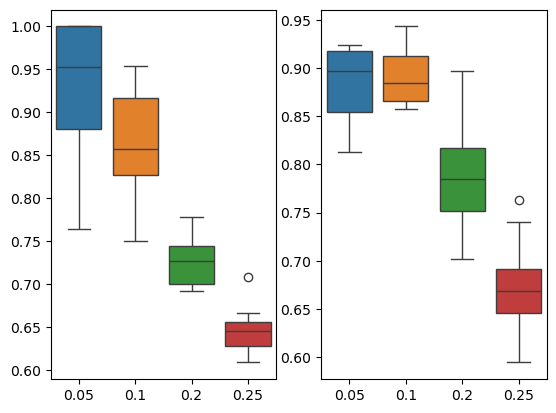

In [8]:
import seaborn as sns
Plot_data_SYNPC = {k: [] for k in Significance}
Plot_data_SYNPAUC = {k: [] for k in Significance}

for seed, val in METRICS_SYNP.items():
    for k, res in val.items():
        Plot_data_SYNPC[k].append(res['Covering'])
        Plot_data_SYNPAUC[k].append(res['AUC'])

fig, ax = plt.subplots(1,2)
sns.boxplot(Plot_data_SYNPAUC,ax=ax[0])
sns.boxplot(Plot_data_SYNPC,ax=ax[1])

In [9]:
WindowLength = [50]#,200]
Significance = [0.05]#,0.1,0.2]
Lookback = [20]#,0.8,0.5]
MonteCarloSample = [1000] #[200,1000,5000]
WassersteinOrder = [2,4,6,8]#[1,2,4]

METRICS_SYNWO = {}



RANDOM_STATES = [2020,2021,2022,2023,2024,2025,2026,2027,2028,2029]


for rs in RANDOM_STATES:
    X, y, centers = make_dynamic_blobs(
        n_samples=n_samples, 
        base_center=base_center, 
        n_clusters=n_clusters, 
        varying_features=varying_features, 
        cluster_std=0.25, 
        center_offset_range=(-1.0, 1.0), 
        random_state=rs
    )
    df,GroundTruth = X, np.where(np.diff(y)!=0)[0]+1
    METRICS_SYNWO[rs] = {}

    print(GroundTruth)

    for combination in product(WindowLength,Significance,Lookback,MonteCarloSample,WassersteinOrder):
        print(combination)
        k,significance, lookack,L,p = combination
        print(k)
        METRICS_SYNWO[rs][p] = {}
        detector = SWDCP(data=df,window_length=k,max_history=k,significance=significance)
        start = time.time()
        detector.process_dataloader(p=p,n_theta=L,explanations=False,seed=2025,verbose=False)
        end = time.time()
        print(end-start)
        f1,cov, auc_score = detector.evaluate(GroundTruth,20)
        METRICS_SYNWO[rs][p]['F1'] = f1
        METRICS_SYNWO[rs][p]['Covering'] = cov
        METRICS_SYNWO[rs][p]['AUC'] = auc_score
        METRICS_SYNWO[rs][p]['cps'] = detector.change_points
        METRICS_SYNWO[rs][p]['RunTime'] = end-start



[ 150  300  450  600  750  900 1050 1200 1350]
(50, 0.05, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:15<00:00, 94.81it/s]


15.307735204696655
F1 score: 0.761904761904762
Covering: 0.8826933548546957
0.7636363636363637
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 1451/1451 [00:14<00:00, 96.98it/s] 


14.976709842681885
F1 score: 0.8000000000000002
Covering: 0.9087105501335468
0.8
(50, 0.05, 20, 1000, 6)
50


100%|██████████| 1451/1451 [00:14<00:00, 99.25it/s] 


14.620007514953613
F1 score: 0.761904761904762
Covering: 0.9122724974554066
0.7636363636363637
(50, 0.05, 20, 1000, 8)
50


100%|██████████| 1451/1451 [00:14<00:00, 99.48it/s] 


14.586473941802979
F1 score: 0.8181818181818182
Covering: 0.8640842519689107
0.825
[ 150  300  450  600  750  900 1050 1200 1350]
(50, 0.05, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:14<00:00, 100.13it/s]


14.490690469741821
F1 score: 1.0
Covering: 0.9186676248944987
1.0
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 1451/1451 [00:14<00:00, 100.87it/s]


14.385298252105713
F1 score: 1.0
Covering: 0.9372590001337038
1.0
(50, 0.05, 20, 1000, 6)
50


100%|██████████| 1451/1451 [00:14<00:00, 97.08it/s] 


14.978351831436157
F1 score: 0.9523809523809523
Covering: 0.9297864102059735
0.9545454545454546
(50, 0.05, 20, 1000, 8)
50


100%|██████████| 1451/1451 [00:14<00:00, 99.80it/s] 


14.539729595184326
F1 score: 0.8695652173913044
Covering: 0.9318175553968513
0.8846153846153846
[ 150  300  450  600  750  900 1050 1200 1350]
(50, 0.05, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:14<00:00, 98.34it/s] 


14.754515409469604
F1 score: 1.0
Covering: 0.9123461448465735
1.0
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 1451/1451 [00:14<00:00, 97.55it/s] 


14.874459505081177
F1 score: 1.0
Covering: 0.9383067922569679
1.0
(50, 0.05, 20, 1000, 6)
50


100%|██████████| 1451/1451 [00:16<00:00, 89.78it/s] 


16.176791429519653
F1 score: 1.0
Covering: 0.9484046514929902
1.0
(50, 0.05, 20, 1000, 8)
50


100%|██████████| 1451/1451 [00:17<00:00, 85.10it/s] 


17.049744129180908
F1 score: 0.9090909090909091
Covering: 0.9387888407597718
0.9166666666666667
[ 150  300  450  600  750  900 1050 1200 1350]
(50, 0.05, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:16<00:00, 89.35it/s] 


16.23927116394043
F1 score: 0.8333333333333333
Covering: 0.8690813122511257
0.8571428571428572
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 1451/1451 [00:16<00:00, 88.12it/s] 


16.481181621551514
F1 score: 0.8
Covering: 0.8797702208806262
0.8333333333333333
(50, 0.05, 20, 1000, 6)
50


100%|██████████| 1451/1451 [00:15<00:00, 94.76it/s] 


15.312824249267578
F1 score: 0.8333333333333333
Covering: 0.8985852673665861
0.8571428571428572
(50, 0.05, 20, 1000, 8)
50


100%|██████████| 1451/1451 [00:14<00:00, 97.89it/s] 


14.822514295578003
F1 score: 0.8333333333333333
Covering: 0.9001678003395335
0.8571428571428572
[ 150  300  450  600  750  900 1050 1200 1350]
(50, 0.05, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:15<00:00, 96.64it/s] 


15.014187812805176
F1 score: 1.0
Covering: 0.9240472093184879
1.0
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 1451/1451 [00:15<00:00, 94.57it/s] 


15.3527193069458
F1 score: 0.9523809523809523
Covering: 0.9419026988983865
0.9545454545454546
(50, 0.05, 20, 1000, 6)
50


100%|██████████| 1451/1451 [00:16<00:00, 88.26it/s]


16.43933081626892
F1 score: 1.0
Covering: 0.9538425782942477
1.0
(50, 0.05, 20, 1000, 8)
50


100%|██████████| 1451/1451 [00:16<00:00, 87.38it/s] 


16.60545325279236
F1 score: 0.9523809523809523
Covering: 0.9595625232166417
0.9545454545454546
[ 150  300  450  600  750  900 1050 1200 1350]
(50, 0.05, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:14<00:00, 97.66it/s] 


14.857481241226196
F1 score: 0.9523809523809523
Covering: 0.9236053280484591
0.9545454545454546
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 1451/1451 [00:15<00:00, 92.73it/s] 


15.647438049316406
F1 score: 0.9523809523809523
Covering: 0.9499385181535221
0.9545454545454546
(50, 0.05, 20, 1000, 6)
50


100%|██████████| 1451/1451 [00:15<00:00, 92.16it/s] 


15.744374752044678
F1 score: 0.9090909090909091
Covering: 0.9556595462268992
0.9166666666666667
(50, 0.05, 20, 1000, 8)
50


100%|██████████| 1451/1451 [00:14<00:00, 97.51it/s] 


14.880486249923706
F1 score: 0.6451612903225806
Covering: 0.8425785250906574
0.7380952380952381
[ 150  300  450  600  750  900 1050 1200 1350]
(50, 0.05, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:14<00:00, 99.79it/s] 


14.539997816085815
F1 score: 0.9473684210526316
Covering: 0.8494387893521832
0.95
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 1451/1451 [00:14<00:00, 97.53it/s] 


14.878093957901001
F1 score: 0.9473684210526316
Covering: 0.8688353550945107
0.95
(50, 0.05, 20, 1000, 6)
50


100%|██████████| 1451/1451 [00:15<00:00, 92.59it/s] 


15.670947313308716
F1 score: 0.9473684210526316
Covering: 0.8823986315645197
0.95
(50, 0.05, 20, 1000, 8)
50


100%|██████████| 1451/1451 [00:14<00:00, 96.96it/s] 


14.964378118515015
F1 score: 0.8333333333333333
Covering: 0.8594919832694318
0.8571428571428572
[ 150  300  450  600  750  900 1050 1200 1350]
(50, 0.05, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:14<00:00, 98.25it/s] 


14.768891334533691
F1 score: 0.8421052631578948
Covering: 0.8248602392082195
0.8444444444444444
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 1451/1451 [00:15<00:00, 91.70it/s] 


15.822551488876343
F1 score: 0.8421052631578948
Covering: 0.8451656574478718
0.8444444444444444
(50, 0.05, 20, 1000, 6)
50


100%|██████████| 1451/1451 [00:15<00:00, 94.10it/s] 


15.419490575790405
F1 score: 0.9
Covering: 0.8559497599392482
0.9
(50, 0.05, 20, 1000, 8)
50


100%|██████████| 1451/1451 [00:14<00:00, 100.23it/s]


14.477469682693481
F1 score: 0.75
Covering: 0.7784696307580546
0.7714285714285715
[ 150  300  450  600  750  900 1050 1200 1350]
(50, 0.05, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:13<00:00, 105.50it/s]


13.754181146621704
F1 score: 0.9473684210526316
Covering: 0.8124706861311776
0.95
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 1451/1451 [00:11<00:00, 124.52it/s]


11.6579430103302
F1 score: 0.8181818181818182
Covering: 0.8215370470844577
0.825
(50, 0.05, 20, 1000, 6)
50


100%|██████████| 1451/1451 [00:11<00:00, 130.01it/s]


11.16399097442627
F1 score: 0.7826086956521738
Covering: 0.8410331361889025
0.7961538461538461
(50, 0.05, 20, 1000, 8)
50


100%|██████████| 1451/1451 [00:10<00:00, 132.63it/s]


10.941932916641235
F1 score: 0.6428571428571429
Covering: 0.7957709442413137
0.7000000000000001
[ 150  300  450  600  750  900 1050 1200 1350]
(50, 0.05, 20, 1000, 2)
50


100%|██████████| 1451/1451 [00:10<00:00, 132.57it/s]


10.945128202438354
F1 score: 1.0
Covering: 0.9172687730808187
1.0
(50, 0.05, 20, 1000, 4)
50


100%|██████████| 1451/1451 [00:11<00:00, 131.60it/s]


11.02599048614502
F1 score: 0.9090909090909091
Covering: 0.9243200829048854
0.9166666666666667
(50, 0.05, 20, 1000, 6)
50


100%|██████████| 1451/1451 [00:09<00:00, 148.20it/s]


9.790521383285522
F1 score: 1.0
Covering: 0.9521226177389899
1.0
(50, 0.05, 20, 1000, 8)
50


100%|██████████| 1451/1451 [00:13<00:00, 109.73it/s]

13.24802303314209
F1 score: 0.9090909090909091
Covering: 0.920503687850273
0.9166666666666667


<Axes: >

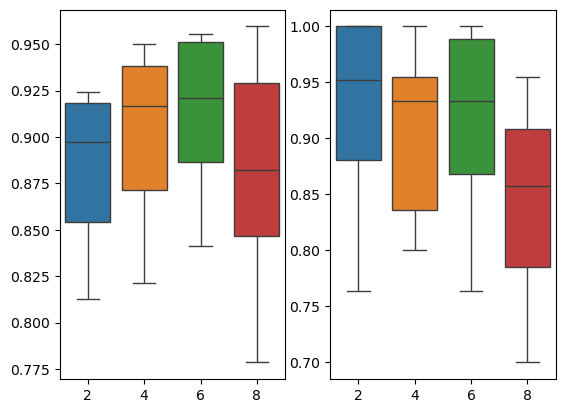

In [10]:
Plot_data_SYNWOC = {k: [] for k in WassersteinOrder}
Plot_data_SYNWOAUC = {k: [] for k in WassersteinOrder}

for seed, val in METRICS_SYNWO.items():
    for k, res in val.items():
        Plot_data_SYNWOAUC[k].append(res['Covering'])
        Plot_data_SYNWOC[k].append(res['AUC'])

fig, ax = plt.subplots(1,2)
sns.boxplot(Plot_data_SYNWOAUC,ax=ax[0])
sns.boxplot(Plot_data_SYNWOC,ax=ax[1])

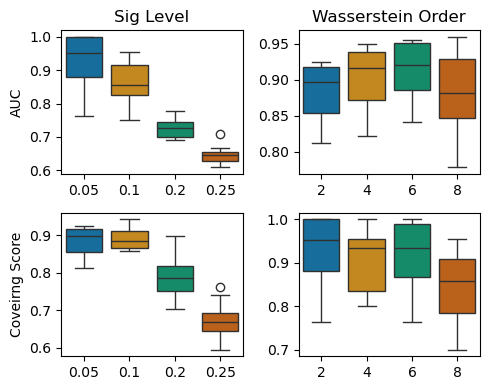

In [14]:

fig2, ax = plt.subplots(2,2,figsize=(5,4))

#sns.color_palette("colorblind")
args ={'palette':sns.color_palette("colorblind",n_colors=4)}
   
ax[0,0].set_title('Sig Level')
ax[0,0].set_ylabel('AUC')
ax[1,0].set_ylabel('Coveirng Score')
sns.boxplot(Plot_data_SYNPAUC,ax=ax[0,0],**args)
sns.boxplot(Plot_data_SYNPC,ax=ax[1,0],**args)

ax[0,1].set_title('Wasserstein Order')
sns.boxplot(Plot_data_SYNWOAUC,ax=ax[0,1],**args)
sns.boxplot(Plot_data_SYNWOC,ax=ax[1,1],**args)

fig2.tight_layout()


In [15]:
fig2.savefig('AdditionalExpAppendix.pdf')